In [58]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import random

# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

# Generate sine wave data
def generate_sine_data(phase_shift=0, num_samples=60000, noise_level=0):
    x = np.linspace(0, 2 * np.pi, num_samples)
    y = np.sin(x + phase_shift) + noise_level * np.random.randn(num_samples)
    return x, y

def generate_cosine_data(phase_shift=0, num_samples=60000, noise_level=0):
    x = np.linspace(0, 2 * np.pi, num_samples)
    y = np.cos(x + phase_shift) + noise_level * np.random.randn(num_samples)
    return x, y

# Domain A: Sine wave without noise
x_A, y_A = generate_sine_data(phase_shift=0)

# Domain B: Sine wave with noise
#x_B, y_B = generate_sine_data(phase_shift=0, noise_level=0.5)
x_B, y_B = generate_cosine_data(phase_shift=0)

# Convert to tensors
x_A_tensor = torch.tensor(x_A, dtype=torch.float32).view(-1, 1)
y_A_tensor = torch.tensor(y_A, dtype=torch.float32).view(-1, 1)
x_B_tensor = torch.tensor(x_B, dtype=torch.float32).view(-1, 1)
y_B_tensor = torch.tensor(y_B, dtype=torch.float32).view(-1, 1)

# Split into train, validation, and test sets for Domain A
x_A_train_val, x_A_test, y_A_train_val, y_A_test = train_test_split(x_A_tensor, y_A_tensor, test_size=0.2, random_state=42)
x_A_train, x_A_val, y_A_train, y_A_val = train_test_split(x_A_train_val, y_A_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2 of original

# Split into train, validation, and test sets for Domain B
x_B_train_val, x_B_test, y_B_train_val, y_B_test = train_test_split(x_B_tensor, y_B_tensor, test_size=0.2, random_state=42)
x_B_train, x_B_val, y_B_train, y_B_val = train_test_split(x_B_train_val, y_B_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2 of original

# Create datasets
train_dataset_A = TensorDataset(x_A_train, y_A_train)
val_dataset_A = TensorDataset(x_A_val, y_A_val)
test_dataset_A = TensorDataset(x_A_test, y_A_test)

train_dataset_B = TensorDataset(x_B_train, y_B_train)
val_dataset_B = TensorDataset(x_B_val, y_B_val)
test_dataset_B = TensorDataset(x_B_test, y_B_test)

# Create data loaders
batch_size = 64
train_loader_A = DataLoader(train_dataset_A, batch_size=batch_size, shuffle=True)
val_loader_A = DataLoader(val_dataset_A, batch_size=batch_size, shuffle=False)
test_loader_A = DataLoader(test_dataset_A, batch_size=batch_size, shuffle=False)

train_loader_B = DataLoader(train_dataset_B, batch_size=batch_size, shuffle=True)
val_loader_B = DataLoader(val_dataset_B, batch_size=batch_size, shuffle=False)
test_loader_B = DataLoader(test_dataset_B, batch_size=batch_size, shuffle=False)

In [17]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import random
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import random

# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

# Generate sine wave segments for each domain
def generate_sine_segments(num_samples_per_segment=20000):
    """Generates sine wave data segmented into different domains."""
    segments_A = [(0, 1), (2, 3), (4, 5)]  # Segments for Domain A
    segments_B = [(1, 2), (3, 4), (5, 6)]  # Segments for Domain B
    
    x_A, y_A, x_B, y_B = [], [], [], []

    for seg in segments_A:
        x_segment = np.linspace(seg[0] * np.pi, seg[1] * np.pi, num_samples_per_segment)
        y_segment = np.sin(x_segment)
        x_A.extend(x_segment)
        y_A.extend(y_segment)

    for seg in segments_B:
        x_segment = np.linspace(seg[0] * np.pi, seg[1] * np.pi, num_samples_per_segment)
        y_segment = np.sin(x_segment)
        x_B.extend(x_segment)
        y_B.extend(y_segment)

    return np.array(x_A), np.array(y_A), np.array(x_B), np.array(y_B)

# Generate data
x_A, y_A, x_B, y_B = generate_sine_segments(num_samples_per_segment=20000)

# Convert to tensors
x_A_tensor = torch.tensor(x_A, dtype=torch.float32).view(-1, 1)
y_A_tensor = torch.tensor(y_A, dtype=torch.float32).view(-1, 1)
x_B_tensor = torch.tensor(x_B, dtype=torch.float32).view(-1, 1)
y_B_tensor = torch.tensor(y_B, dtype=torch.float32).view(-1, 1)

# Split data into training, validation, and test sets for Domain A
x_A_train_val, x_A_test, y_A_train_val, y_A_test = train_test_split(x_A_tensor, y_A_tensor, test_size=0.2, random_state=42)
x_A_train, x_A_val, y_A_train, y_A_val = train_test_split(x_A_train_val, y_A_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2 of original

# Split data into training, validation, and test sets for Domain B
x_B_train_val, x_B_test, y_B_train_val, y_B_test = train_test_split(x_B_tensor, y_B_tensor, test_size=0.2, random_state=42)
x_B_train, x_B_val, y_B_train, y_B_val = train_test_split(x_B_train_val, y_B_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2 of original

# Create datasets
train_dataset_A = TensorDataset(x_A_train, y_A_train)
val_dataset_A = TensorDataset(x_A_val, y_A_val)
test_dataset_A = TensorDataset(x_A_test, y_A_test)

train_dataset_B = TensorDataset(x_B_train, y_B_train)
val_dataset_B = TensorDataset(x_B_val, y_B_val)
test_dataset_B = TensorDataset(x_B_test, y_B_test)

# Create data loaders
batch_size = 64
train_loader_A = DataLoader(train_dataset_A, batch_size=batch_size, shuffle=True)
val_loader_A = DataLoader(val_dataset_A, batch_size=batch_size, shuffle=False)
test_loader_A = DataLoader(test_dataset_A, batch_size=batch_size, shuffle=False)

train_loader_B = DataLoader(train_dataset_B, batch_size=batch_size, shuffle=True)
val_loader_B = DataLoader(val_dataset_B, batch_size=batch_size, shuffle=False)
test_loader_B = DataLoader(test_dataset_B, batch_size=batch_size, shuffle=False)


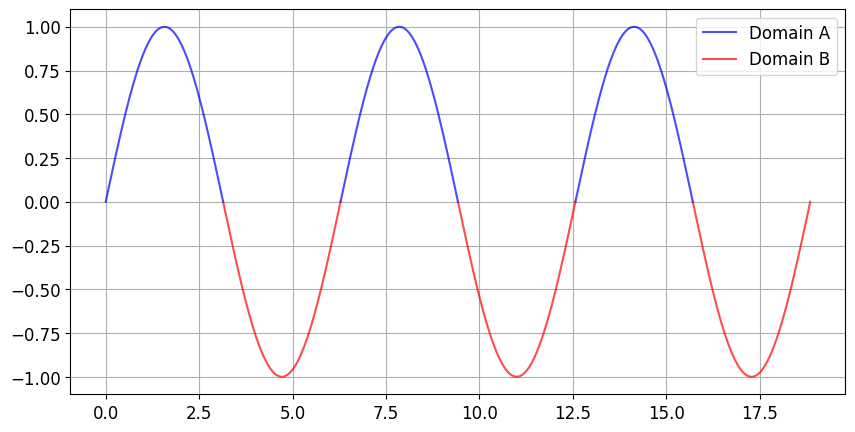

In [111]:
# Re-plot the sine wave segments without connecting horizontal lines

import numpy as np
import matplotlib.pyplot as plt

# Generate sine wave segments for each domain
def generate_sine_segments(num_samples_per_segment=20000):
    """Generates sine wave data segmented into different domains."""
    segments_A = [(0, 1), (2, 3), (4, 5)]  # Segments for Domain A
    segments_B = [(1, 2), (3, 4), (5, 6)]  # Segments for Domain B
    
    x_A, y_A, x_B, y_B = [], [], [], []

    for seg in segments_A:
        x_segment = np.linspace(seg[0] * np.pi, seg[1] * np.pi, num_samples_per_segment)
        y_segment = np.sin(x_segment)
        x_A.append(x_segment)
        y_A.append(y_segment)

    for seg in segments_B:
        x_segment = np.linspace(seg[0] * np.pi, seg[1] * np.pi, num_samples_per_segment)
        y_segment = np.sin(x_segment)
        x_B.append(x_segment)
        y_B.append(y_segment)

    return x_A, y_A, x_B, y_B

# Generate data
x_A_segments, y_A_segments, x_B_segments, y_B_segments = generate_sine_segments(num_samples_per_segment=20000)

# Plot the sine wave with domain segmentation without connecting horizontal lines
plt.figure(figsize=(10, 5))

# Plot each segment separately for Domain A without duplicate legend entries
for i, (x, y) in enumerate(zip(x_A_segments, y_A_segments)):
    if i == 0:
        plt.plot(x, y, label='Domain A', color='blue', alpha=0.7)
    else:
        plt.plot(x, y, color='blue', alpha=0.7)

# Plot each segment separately for Domain B without duplicate legend entries
for i, (x, y) in enumerate(zip(x_B_segments, y_B_segments)):
    if i == 0:
        plt.plot(x, y, label='Domain B', color='red', alpha=0.7)
    else:
        plt.plot(x, y, color='red', alpha=0.7)

plt.xticks(fontsize=12)                 # Font size for x-axis ticks
plt.yticks(fontsize=12) 
plt.legend(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig('Split_sinewave.pdf')

# Display the plot
plt.show()


In [18]:
def train_with_ewc(model, optimizer, dataloaders, ewc=None, lambda_ewc=0.1, epochs=5):
    """
    Train the model with or without EWC penalty.
    
    Args:
        model: Neural network model to train.
        optimizer: Optimizer for training.
        dataloaders: Dictionary containing 'train' and optionally 'val' dataloaders.
        ewc: Instance of the EWC class, or None if not using EWC.
        lambda_ewc: Importance of the EWC penalty (default is 0.1).
        epochs: Number of epochs to train.
    """
    criterion = nn.MSELoss()
    
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        
        for inputs, targets in dataloaders['train']:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            # Add EWC penalty if applicable
            if ewc is not None:
                ewc_penalty = ewc.penalty(model)
                loss += lambda_ewc * ewc_penalty
            
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(dataloaders['train'])}")

In [19]:
class OnlineEWC:
    def __init__(self, model, dataloader):
        """
        Online EWC implementation.
        Args:
            model: Neural network model.
            dataloader: DataLoader for the current task.
        """
        self.model = model
        self.dataloader = dataloader
        self.fisher_matrix = {}
        self.optimal_params = {}

    # def update_fisher_matrix(self):
    #     """
    #     Update the Fisher matrix using the online method.
    #     """
    #     self.model.eval()
    #     fisher_diagonal = {n: torch.zeros_like(p) for n, p in self.model.named_parameters() if p.requires_grad}
        
    #     for i, (data, target) in enumerate(self.dataloader, 1):
    #         self.model.zero_grad()
    #         output = self.model(data)
    #         loss = F.mse_loss(output, target)
    #         loss.backward()

    #         # Update Fisher diagonal iteratively
    #         for n, p in self.model.named_parameters():
    #             if p.grad is not None:
    #                 fisher_diagonal[n] += (p.grad ** 2 - fisher_diagonal[n]) / i
        
    #     # Update Fisher matrix with the new Fisher diagonal values
    #     for n in fisher_diagonal:
    #         if n in self.fisher_matrix:
    #             self.fisher_matrix[n] += fisher_diagonal[n]
    #         else:
    #             self.fisher_matrix[n] = fisher_diagonal[n]

    def update_fisher_matrix(self):
        fisher_threshold = 1e-3  # Adjust based on dataset scale
        self.model.eval()
        fisher_diagonal = {n: torch.zeros_like(p) for n, p in self.model.named_parameters() if p.requires_grad}
    
        for i, (data, target) in enumerate(self.dataloader, 1):
            self.model.zero_grad()
            output = self.model(data)
            loss = F.mse_loss(output, target)
            loss.backward()
    
            # Update Fisher diagonal iteratively
            for n, p in self.model.named_parameters():
                if p.grad is not None:
                    fisher_diagonal[n] += (p.grad ** 2 - fisher_diagonal[n]) / i
    
        for n in fisher_diagonal:
            fisher_diagonal[n][fisher_diagonal[n] < fisher_threshold] = 0  # Apply threshold
            if n in self.fisher_matrix:
                self.fisher_matrix[n] += fisher_diagonal[n]
            else:
                self.fisher_matrix[n] = fisher_diagonal[n]


    def store_optimal_params(self):
        """
        Store a copy of the model's current parameters as the optimal parameters for the current task.
        """
        self.optimal_params = {n: p.clone().detach() for n, p in self.model.named_parameters() if p.requires_grad}

    def penalty(self, model):
        """
        Calculate the EWC penalty based on the Fisher matrix and optimal parameters.
        """
        penalty = 0.0
        for n, p in model.named_parameters():
            if p.requires_grad and n in self.fisher_matrix:
                penalty += (self.fisher_matrix[n] * (p - self.optimal_params[n]) ** 2).sum()
                #penalty += (self.fisher_matrix[n] * (p - self.optimal_params[n]) ** 2).sum() / len(self.fisher_matrix)

        return penalty



In [20]:
import numpy as np

# Assuming 'y_noisy' is your noisy sine wave data and 'y_clean' is the original sine wave
noise = y_B - y_A

# Standard deviation of the noise
noise_amplitude_std = np.std(noise)

# Mean absolute deviation of the noise
noise_amplitude_mad = np.mean(np.abs(noise))

print("Noise Amplitude (Standard Deviation):", noise_amplitude_std)
print("Noise Amplitude (Mean Absolute Deviation):", noise_amplitude_mad)


# Standard deviation of the noise
noise_amplitude_std = np.std(noise)

# Mean absolute deviation of the noise
noise_amplitude_mad = np.mean(np.abs(noise))

print("Noise Amplitude (Standard Deviation):", noise_amplitude_std)
print("Noise Amplitude (Mean Absolute Deviation):", noise_amplitude_mad)


# Calculate the peak-to-peak amplitude of the sine wave
sine_amplitude = np.max(y_A) - np.min(y_A)

# Ratio of noise amplitude to sine wave amplitude
noise_to_sine_ratio_std = noise_amplitude_std / sine_amplitude
noise_to_sine_ratio_mad = noise_amplitude_mad / sine_amplitude

print("Ratio of Noise to Sine Amplitude (Standard Deviation):", noise_to_sine_ratio_std)
print("Ratio of Noise to Sine Amplitude (Mean Absolute Deviation):", noise_to_sine_ratio_mad)


Noise Amplitude (Standard Deviation): 0.6155673628696071
Noise Amplitude (Mean Absolute Deviation): 1.2731758801398012
Noise Amplitude (Standard Deviation): 0.6155673628696071
Noise Amplitude (Mean Absolute Deviation): 1.2731758801398012
Ratio of Noise to Sine Amplitude (Standard Deviation): 0.6155673647683612
Ratio of Noise to Sine Amplitude (Mean Absolute Deviation): 1.2731758840669878


In [21]:
class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet, self).__init__()
        self.fc1 = nn.Linear(1, 10)  # Input dimension is 1 (sine value)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)  # Output dimension is 1 (sine value prediction)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [22]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(1, 50)
        self.dropout1 = nn.Dropout(0.2)  # Add dropout
        self.fc2 = nn.Linear(50, 50)
        self.dropout2 = nn.Dropout(0.2)  # Add dropout
        self.fc3 = nn.Linear(50, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x


In [23]:
def evaluate(model, loader, criterion):
    model.eval()
    total_loss = 0
    total_mse = 0
    total_mae = 0
    with torch.no_grad():
        for data, target in loader:
            output = model(data)
            loss = criterion(output, target)
            total_loss += loss.item()
            total_mse += F.mse_loss(output, target).item()
            total_mae += F.l1_loss(output, target).item()
    return {
        'loss': total_loss / len(loader),
        'mse': total_mse / len(loader),
        'mae': total_mae / len(loader)
    }


In [70]:
import torch
import torch.nn as nn
import torch.optim as optim

import torch.nn.functional as F

class EWC:
    def __init__(self, model, dataloader, importance=10):
        self.model = model
        self.dataloader = dataloader
        self.importance = importance
        self.initial_params = {n: p.clone() for n, p in self.model.named_parameters()}
        self.fisher_diagonal = self.compute_fisher_information()


    def compute_fisher_information(self):
         fisher_diagonal = {n: torch.zeros_like(p) for n, p in self.model.named_parameters()}
         self.model.eval()
    
         for i, (data, target) in enumerate(self.dataloader, 1):
            self.model.zero_grad()
        
            # Pass both `data` and `task_id` to the model
            output = self.model(data)
        
            # Use the target for the loss
            loss = F.mse_loss(output, target)
            loss.backward()
        
            # Fisher information accumulation
            for n, p in self.model.named_parameters():
                grad_squared = p.grad ** 2
                fisher_diagonal[n] = fisher_diagonal[n] + (grad_squared - fisher_diagonal[n]) / i
        
         return fisher_diagonal

    def penalty(self):
        penalty = 0
        for n, p in self.model.named_parameters():
            penalty += (self.fisher_diagonal[n] * (p - self.initial_params[n]) ** 2).sum()
        return self.importance * penalty


In [24]:
class SynapticIntelligence:
    def __init__(self, model, dataloader, importance=5000):
        self.model = model
        self.dataloader = dataloader
        self.importance = importance
        self.initial_params = {n: p.clone() for n, p in self.model.named_parameters()}
        self.omega = {n: torch.zeros_like(p) for n, p in self.model.named_parameters()}
        self.compute_omega()

    def compute_omega(self):
        self.model.eval()
        for data, target in self.dataloader:
            self.model.zero_grad()
            output = self.model(data)
            loss = F.mse_loss(output, target)  # Use MSE loss for regression
            loss.backward()
            for n, p in self.model.named_parameters():
                if p.grad is not None:
                    self.omega[n] += p.grad.abs() / len(self.dataloader)
                    
    def update_omega(self, delta_t, delta_theta):
        for n, p in self.model.named_parameters():
            if p.grad is not None:
                self.omega[n] += self.importance * (delta_t[n] * delta_theta[n]).abs()

    def penalty(self, delta_t):
        penalty = 0
        for n, p in self.model.named_parameters():
            penalty += (self.omega[n] * (p - self.initial_params[n]) ** 2).sum()
        return penalty

def train_with_si(model, loader, optimizer, criterion, si, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        total_penalty = 0
        for data, target in loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            delta_t = {n: p.clone().detach() - si.initial_params[n] for n, p in model.named_parameters()}
            delta_theta = {n: p.grad.clone().detach() for n, p in model.named_parameters() if p.grad is not None}
            si.update_omega(delta_t, delta_theta)
            penalty = si.penalty(delta_t)
            total_loss += loss.item()
            total_penalty += penalty.item()
            loss += penalty
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(loader):.4f}, Penalty: {total_penalty / len(loader):.4f}')

class SynapticIntelligence:
    def __init__(self, model, dataloader, importance=100):
        self.model = model
        self.dataloader = dataloader
        self.importance = importance
        self.init_params = {n: p.clone().detach() for n, p in self.model.named_parameters()}
        self.omega = {n: torch.zeros_like(p) for n, p in self.model.named_parameters()}

    def update_omega(self, grads):
        for n, p in self.model.named_parameters():
            if p.grad is not None:
                self.omega[n] += (grads[n] ** 2) / ((p - self.init_params[n]) ** 2 + 1e-8)

    def penalty(self):
        penalty = 0
        for n, p in self.model.named_parameters():
            penalty += (self.omega[n] * (p - self.init_params[n]) ** 2).sum()
        return self.importance * penalty


def train_with_si(model, loader, optimizer, criterion, si, epochs=50):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        total_penalty = 0

        for data, target in loader:
            optimizer.zero_grad()

            # Forward pass
            output = model(data)
            loss = criterion(output, target)

            # Compute the SI penalty outside the graph
            penalty = si.penalty().detach()  # Detach penalty computation from the graph
            total_loss += loss.item()
            total_penalty += penalty.item()

            # Add the penalty to the loss
            loss_with_penalty = loss + penalty

            # Backward pass and optimizer step
            loss_with_penalty.backward()
            optimizer.step()

        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(loader):.4f}, Penalty: {total_penalty / len(loader):.4f}")





In [25]:
import logging

# Configure logging
logging.basicConfig(
    filename="si_debug.log",  # Save logs to a file
    level=logging.INFO,  # Set the level of details
    format="%(asctime)s - %(message)s"
)

class SynapticIntelligence:
    def __init__(self, model, dataloader):
        """
        Synaptic Intelligence (SI) implementation.
        Args:
            model: Neural network model.
            dataloader: DataLoader for the current task.
        """
        self.model = model
        self.dataloader = dataloader
        self.omega = {}
        self.optimal_params = {}

        # Initialize omega and optimal_params
        self._initialize_params()

    def _initialize_params(self):
        """
        Initialize or reset omega and optimal_params to match the current model's parameters.
        """
        self.omega = {n: torch.zeros_like(p) for n, p in self.model.named_parameters() if p.requires_grad}
        self.optimal_params = {n: p.clone().detach() for n, p in self.model.named_parameters() if p.requires_grad}

    def update_omega(self):
        self.model.eval()
        fisher_diagonal = {n: torch.zeros_like(p) for n, p in self.model.named_parameters() if p.requires_grad}
        
        dataset_size = len(self.dataloader.dataset)  # Normalize by dataset size
        for i, (data, target) in enumerate(self.dataloader, 1):
            self.model.zero_grad()
            output = self.model(data)
            loss = F.mse_loss(output, target)  # Use MSE loss for regression
            loss.backward()
            
            # Accumulate squared gradients
            for n, p in self.model.named_parameters():
                if p.grad is not None and p.requires_grad:
                    fisher_diagonal[n] += (p.grad ** 2 - fisher_diagonal[n]) / i
    
        # Normalize and update Omega
        for n in fisher_diagonal:
            if n in self.omega:
                self.omega[n] += fisher_diagonal[n] / dataset_size  # Normalize by dataset size
            else:
                self.omega[n] = fisher_diagonal[n] / dataset_size
    
        # Log Omega stats
        omega_stats = {n: (self.omega[n].max().item(), self.omega[n].min().item()) for n in self.omega}
        logging.info(f"Updated Omega stats: {omega_stats}")


    def store_optimal_params(self):
        """
        Store the current model parameters as the optimal parameters after training a task.
        """
        self.optimal_params = {n: p.clone().detach() for n, p in self.model.named_parameters() if p.requires_grad}

    def penalty(self, model):
        penalty = 0.0
        for n, p in model.named_parameters():
            if n in self.omega and n in self.optimal_params:
                diff = p - self.optimal_params[n]
                term = (self.omega[n] * diff ** 2).sum()
                penalty += term
        # Log penalty details
        logging.info(f"Penalty computed: {penalty}")
        return penalty





In [26]:
def train_with_si(model, optimizer, dataloaders, si=None, lambda_si=0.1, epochs=5):
    """
    Train the model with or without SI penalty.

    Args:
        model: Neural network model to train.
        optimizer: Optimizer for training.
        dataloaders: Dictionary containing 'train' and optionally 'val' dataloaders.
        si: Instance of the SynapticIntelligence class, or None if not using SI.
        lambda_si: Importance of the SI penalty (default is 0.1).
        epochs: Number of epochs to train.
    """
    criterion = nn.MSELoss()

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        total_penalty = 0.0

        for inputs, targets in dataloaders['train']:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # Add SI penalty if applicable
            if si is not None:
                si_penalty = si.penalty(model)
                loss += lambda_si * si_penalty
                total_penalty += si_penalty.item()

            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Log losses
        avg_loss = running_loss / len(dataloaders['train'])
        avg_penalty = total_penalty / len(dataloaders['train'])
        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}, Penalty: {avg_penalty:.4f}")


In [41]:
def train_with_rehearsal(model, loader_new, loader_replay, optimizer, criterion, epochs=10, replay_ratio=0.5):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        batch_count = 0  # Track the number of batches for accurate averaging
        for data_new, target_new in loader_new:
            if random.random() < replay_ratio:
                data_replay, target_replay = next(iter(loader_replay))
                data, target = torch.cat([data_new, data_replay]), torch.cat([target_new, target_replay])
            else:
                data, target = data_new, target_new
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            batch_count += 1
        
        # Print loss once per epoch
        avg_loss = total_loss / batch_count
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}')


In [28]:
# Progressive Neural Networks
class ProgressiveNN(nn.Module):
    def __init__(self, input_dim=1, output_dim=1, shared_dim=10):
        super(ProgressiveNN, self).__init__()
        self.task_nets = nn.ModuleList()
        self.shared_dim = shared_dim
        self.add_new_task(input_dim, output_dim)

    def add_new_task(self, input_dim, output_dim):
        if len(self.task_nets) > 0:
            self.freeze_task(self.task_nets[-1])
        task_net = nn.Sequential(
            nn.Linear(input_dim, self.shared_dim),
            nn.ReLU(),
            nn.Linear(self.shared_dim, self.shared_dim),
            nn.ReLU(),
            nn.Linear(self.shared_dim, output_dim)
        )
        self.task_nets.append(task_net)

    def freeze_task(self, task_net):
        for param in task_net.parameters():
            param.requires_grad = False

    def forward(self, x, task_id):
        task_net = self.task_nets[task_id]
        return task_net(x)

class ProgressiveNN(nn.Module):
    def __init__(self, input_dim=128, hidden_dim=128, output_dim=1):
        super(ProgressiveNN, self).__init__()
        # Task-specific layers for Task A
        self.task0_fc1 = nn.Linear(input_dim, hidden_dim)
        self.task0_fc2 = nn.Linear(hidden_dim, output_dim)
        
        # Task-specific layers for Task B
        self.task1_fc1 = nn.Linear(input_dim, hidden_dim)
        self.task1_fc2 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x, task_num):
        if task_num == 0:
            x = F.relu(self.task0_fc1(x))
            x = self.task0_fc2(x)
        elif task_num == 1:
            x = F.relu(self.task1_fc1(x))
            x = self.task1_fc2(x)
        else:
            raise ValueError("Invalid task_num. Ensure task_num is 0 or 1.")
        return x


def train_prognn(model, loader, optimizer, criterion, task_num, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for data, target in loader:
            if data.shape[1] != 128:
                data = data.expand(-1, 128)  # Expands the data to shape [batch_size, 128]
            optimizer.zero_grad()
            
            # Forward pass with task_num
            output = model(data, task_num)
            
            # Check if output requires grad
            if not output.requires_grad:
                raise RuntimeError("Model output does not require gradients. Check if task_num is correct.")
            
            # Compute loss
            loss = criterion(output, target)
            
            # Check if loss requires grad
            if not loss.requires_grad:
                raise RuntimeError("Loss does not require gradients. Check if model and task_num are set up correctly.")
            
            # Backward pass
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(loader):.4f}')



def evaluate_prognn(model, loader, criterion, task_num):
    model.eval()
    total_loss = 0
    total_mse = 0
    total_mae = 0
    with torch.no_grad():
        for data, target in loader:
            if data.shape[1] != 128:
                data = data.expand(-1, 128)  # Expands the data to shape [batch_size, 128]
            output = model(data, task_num)
            loss = criterion(output, target)
            total_loss += loss.item()
            total_mse += F.mse_loss(output, target).item()
            total_mae += F.l1_loss(output, target).item()
    return {
        'loss': total_loss / len(loader),
        'mse': total_mse / len(loader),
        'mae': total_mae / len(loader)
    }

In [29]:
epoch_stats_other = {
    "si": {"acc_B": [], "loss_B": [], "task_A_during_B":[],"task_A_during_B_loss":[],"val_task_A_during_B":[],"val_acc_B":[],"B_during_A":[],"A_during_A":[],"B_during_A_val":[],"A_during_A_val":[]},
    "pnn": {"acc_B": [], "loss_B": [], "task_A_during_B":[],"task_A_during_B_loss":[],"val_task_A_during_B":[],"val_acc_B":[],"B_during_A":[],"A_during_A":[],"B_during_A_val":[],"A_during_A_val":[]},
    "reh": {"acc_B": [], "loss_B": [], "task_A_during_B":[],"task_A_during_B_loss":[],"val_task_A_during_B":[],"val_acc_B":[],"B_during_A":[],"A_during_A":[],"B_during_A_val":[],"A_during_A_val":[]}
}

In [ ]:
epochs = 100
num_runs = 10
criterion = nn.MSELoss()
for run in range(num_runs):
    print(f"Run {run + 1}/{num_runs}")

    # Synaptic Intelligence
    model_si = SimpleNeuralNet()
    optimizer_si = optim.Adam(model_si.parameters(), lr=0.0001)

    # checkpoint = torch.load('dil_toy_task_model.pth')
    # model_state_dict = model_si.state_dict()
    
    # # Filter layers with matching shapes
    # filtered_state_dict = {k: v for k, v in checkpoint.items() if k in model_state_dict and v.shape == model_state_dict[k].shape}
    # model_state_dict.update(filtered_state_dict)
    # model_si.load_state_dict(model_state_dict)

    # Reuse Task A weights for initializing Task B models
    #for i, weights in enumerate(dom_a_weights):
    
    si = SynapticIntelligence(model_si, train_loader_A)
    # model_si.load_state_dict(torch.load('dil_toy_task_model.pth'))
      
    # Train on Domain A and compute SI
    task_A_during_A_run = []
    task_B_during_A_run = []

    task_A_during_A_run_val = []
    task_B_during_A_run_val = []
        
    for epoch in range(epochs):
        train_with_si(model_si, optimizer_si, {'train': train_loader_A, 'val': val_loader_A}, si=None, lambda_si=0, epochs=1)

        si_A_during_A_metrics = evaluate(model_si, test_loader_A, criterion)
        task_A_during_A_run.append(si_A_during_A_metrics['mae'])

        si_A_during_A_metrics_val = evaluate(model_si, val_loader_A, criterion)
        task_A_during_A_run_val.append(si_A_during_A_metrics_val['mae'])
        print(f"Domain A during A with SI: {si_A_during_A_metrics_val}")

        # Evaluate on test set for Domain B
        si_B_during_A_metrics = evaluate(model_si, test_loader_B, criterion)
        task_B_during_A_run.append(si_B_during_A_metrics['mae'])

        si_B_during_A_metrics_val = evaluate(model_si, val_loader_B, criterion)
        task_B_during_A_run_val.append(si_B_during_A_metrics_val['mae'])

    epoch_stats_other["si"]["A_during_A"].append(task_A_during_A_run)
    epoch_stats_other["si"]["B_during_A"].append(task_B_during_A_run)

    epoch_stats_other["si"]["A_during_A_val"].append(task_A_during_A_run_val)
    epoch_stats_other["si"]["B_during_A_val"].append(task_B_during_A_run_val)
    
    #torch.save(model_si.state_dict(), 'dil_toy_task_model.pth')
    
    # Evaluate initial performance on Domain A (test and validation)
    metrics_domainA_initial_si_test = evaluate(model_si, test_loader_A, criterion)
    metrics_domainA_initial_si_val = evaluate(model_si, val_loader_A, criterion)
    print(f"Domain A - Initial with SI (Test): {metrics_domainA_initial_si_test}")
    print(f"Domain A - Initial with SI (Validation): {metrics_domainA_initial_si_val}")

    task_A_during_B_si_run = []
    task_B_si_run = []
    val_A_during_B_si_run = []
    val_B_si_run = []

    si.update_omega()
    si.store_optimal_params()
    #si = SynapticIntelligence(model_si, train_loader_A,importance = 999999999999999999)
    
    
    # Train on Domain B with SI
    for epoch in range(epochs):
        #train_with_si(model_si, train_loader_B, optimizer_si, criterion, si, epochs=1)
        train_with_si(model_si, optimizer_si, {'train': train_loader_B, 'val': val_loader_B}, si=si, lambda_si=999000000, epochs=1)

        # Evaluate on test set for Domain B
        si_B_metrics = evaluate(model_si, test_loader_B, criterion)
        #epoch_stats_other["si"]["loss_B"].append(si_B_metrics['loss'])
        task_B_si_run.append(si_B_metrics['mae'])

        # Evaluate on validation set for Domain B
        si_B_val_metrics = evaluate(model_si, val_loader_B, criterion)
        val_B_si_run.append(si_B_val_metrics['mae'])
        print(f"Domain B during B with SI: {si_B_val_metrics}")

        # Evaluate performance on Domain A during training on Domain B (test and validation)
        si_performance_A_during_B = evaluate(model_si, test_loader_A, criterion)
        #epoch_stats_other["si"]["task_A_during_B_loss"].append(si_performance_A_during_B['loss'])
        task_A_during_B_si_run.append(si_performance_A_during_B['mae'])

        si_performance_A_during_B_val = evaluate(model_si, val_loader_A, criterion)
        val_A_during_B_si_run.append(si_performance_A_during_B_val['mae'])
        print(f"Domain A during B with SI: {si_performance_A_during_B_val}")

    epoch_stats_other["si"]["task_A_during_B"].append(task_A_during_B_si_run)
    epoch_stats_other["si"]["acc_B"].append(task_B_si_run)

    # Store validation metrics for each run
    epoch_stats_other["si"]["val_task_A_during_B"].append(val_A_during_B_si_run)
    epoch_stats_other["si"]["val_acc_B"].append(val_B_si_run)

    # Evaluate final performance on Domain B with SI
    metrics_domainB_si_test = evaluate(model_si, test_loader_B, criterion)
    metrics_domainB_si_val = evaluate(model_si, val_loader_B, criterion)
    print(f"Domain B with SI (Test): {metrics_domainB_si_test}")
    print(f"Domain B with SI (Validation): {metrics_domainB_si_val}")

    # Evaluate final performance on Domain A after Domain B with SI
    metrics_domainA_after_B_si_test = evaluate(model_si, test_loader_A, criterion)
    metrics_domainA_after_B_si_val = evaluate(model_si, val_loader_A, criterion)
    print(f"Domain A after Domain B with SI (Test): {metrics_domainA_after_B_si_test}")
    print(f"Domain A after Domain B with SI (Validation): {metrics_domainA_after_B_si_val}")

    # with open('epoch_stats_other_dil_toy_si_split_sinewave.json', 'w') as f:
    #     json.dump(epoch_stats_other, f, indent=4)


In [30]:
class RehearsalBuffer:
    def __init__(self, buffer_size=200):
        self.buffer_size = buffer_size
        self.buffer = []

    def add_to_buffer(self, data, target):
        for i in range(len(data)):
            if len(rehearsal_buffer.buffer) > 0:
                rehearsal_data, rehearsal_target = rehearsal_buffer.get_buffer()
                data = torch.cat((data, rehearsal_data))
                target = torch.cat((target, rehearsal_target))  # No shape mismatch now

    def get_buffer(self):
        data, target = zip(*self.buffer)
        return torch.stack(data), torch.tensor(target).view(-1)  # Ensure 1D targets


def train_with_rehearsal(model, dataloader, rehearsal_buffer, optimizer, criterion, epochs=50, patience=5):
    model.train()
    best_loss = float('inf')
    no_improvement = 0

    for epoch in range(epochs):
        total_loss = 0
        for data, target in dataloader:
            optimizer.zero_grad()
            
            # Get rehearsal data
            if len(rehearsal_buffer.buffer) > 0:
                rehearsal_data, rehearsal_target = rehearsal_buffer.get_buffer()
                data = torch.cat((data, rehearsal_data))
                target = torch.cat((target, rehearsal_target))

            output = model(data)
            loss = criterion(output, target)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()

            rehearsal_buffer.add_to_buffer(data, target)
        
        avg_loss = total_loss / len(dataloader)
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}')

        # Stopping criteria based on loss improvement
        if avg_loss < best_loss:
            best_loss = avg_loss
            no_improvement = 0
        else:
            no_improvement += 1

        if no_improvement >= patience:
            print("Stopping early due to no improvement in loss.")
            break

In [47]:
for key in epoch_stats_other["reh"]:
    epoch_stats_other["reh"][key] = []

In [48]:
num_runs = 10
epochs = 100
for run in range(num_runs):
    print(f"Run {run + 1}/{num_runs}")

    # Data Rehearsal
    model_rehearsal = SimpleNeuralNet()
    optimizer_rehearsal = optim.Adam(model_rehearsal.parameters(), lr=0.0001)
    rehearsal_buffer = RehearsalBuffer(buffer_size=6000)
    criterion = nn.MSELoss()
    #model_rehearsal.load_state_dict(torch.load('dil_toy_task_model.pth'))

    task_A_during_A_run = []
    task_B_during_A_run = []

    task_A_during_A_run_val = []
    task_B_during_A_run_val = []
    
    # Train on Domain A with rehearsal
    for epoch in range(epochs):
        train(model_rehearsal, train_loader_A, optimizer_rehearsal, criterion, epochs=1)

        reh_A_during_A_metrics = evaluate(model_rehearsal, test_loader_A, criterion)
        task_A_during_A_run.append(reh_A_during_A_metrics['mae'])

        reh_A_during_A_metrics_val = evaluate(model_rehearsal, val_loader_A, criterion)
        task_A_during_A_run_val.append(reh_A_during_A_metrics_val['mae'])

        # Evaluate on test set for Domain B
        reh_B_during_A_metrics = evaluate(model_rehearsal, test_loader_B, criterion)
        task_B_during_A_run.append(reh_B_during_A_metrics['mae'])

        reh_B_during_A_metrics_val = evaluate(model_rehearsal, val_loader_B, criterion)
        task_B_during_A_run_val.append(reh_B_during_A_metrics_val['mae'])

    epoch_stats_other["reh"]["A_during_A"].append(task_A_during_A_run)
    epoch_stats_other["reh"]["B_during_A"].append(task_B_during_A_run)

    epoch_stats_other["reh"]["A_during_A_val"].append(task_A_during_A_run_val)
    epoch_stats_other["reh"]["B_during_A_val"].append(task_B_during_A_run_val)
    
    # Evaluate initial performance on Domain A (test and validation)
    metrics_domainA_initial_rehearsal_test = evaluate(model_rehearsal, test_loader_A, criterion)
    metrics_domainA_initial_rehearsal_val = evaluate(model_rehearsal, val_loader_A, criterion)
    print(f"Domain A - Initial with Rehearsal (Test): {metrics_domainA_initial_rehearsal_test}")
    print(f"Domain A - Initial with Rehearsal (Validation): {metrics_domainA_initial_rehearsal_val}")
    
    task_A_during_B_reh_run = []
    task_B_reh_run = []
    val_A_during_B_reh_run = []
    val_B_reh_run = []

    # Train on Domain B with rehearsal
    for epoch in range(epochs):
        #train_with_rehearsal(model_rehearsal, train_loader_B, rehearsal_buffer, optimizer_rehearsal, criterion, epochs=1)
        train_with_rehearsal(model_rehearsal, train_loader_B, train_loader_A, optimizer_rehearsal, criterion, epochs=1, replay_ratio=0.85)
    
        # Evaluate on test set for Domain B
        reh_B_metrics = evaluate(model_rehearsal, test_loader_B, criterion)
        #epoch_stats_other["reh"]["loss_B"].append(reh_B_metrics['loss'])
        task_B_reh_run.append(reh_B_metrics['mae'])
        
        # Evaluate on validation set for Domain B
        reh_B_val_metrics = evaluate(model_rehearsal, val_loader_B, criterion)
        val_B_reh_run.append(reh_B_val_metrics['mae'])
        print(reh_B_val_metrics)

        # Evaluate performance on Domain A during training on Domain B (test and validation)
        reh_performance_A_during_B = evaluate(model_rehearsal, test_loader_A, criterion)
        #epoch_stats_other["reh"]["task_A_during_B_loss"].append(reh_performance_A_during_B['loss'])
        task_A_during_B_reh_run.append(reh_performance_A_during_B['mae'])

        reh_performance_A_during_B_val = evaluate(model_rehearsal, val_loader_A, criterion)
        val_A_during_B_reh_run.append(reh_performance_A_during_B_val['mae'])
        print(reh_performance_A_during_B_val)

    epoch_stats_other["reh"]["task_A_during_B"].append(task_A_during_B_reh_run)
    epoch_stats_other["reh"]["acc_B"].append(task_B_reh_run)

    # Store validation metrics for each run
    epoch_stats_other["reh"]["val_task_A_during_B"].append(val_A_during_B_reh_run)
    epoch_stats_other["reh"]["val_acc_B"].append(val_B_reh_run)
    
    # Evaluate performance on Domain B with rehearsal (test and validation)
    metrics_domainB_rehearsal_test = evaluate(model_rehearsal, test_loader_B, criterion)
    metrics_domainB_rehearsal_val = evaluate(model_rehearsal, val_loader_B, criterion)
    print(f"Domain B with Rehearsal (Test): {metrics_domainB_rehearsal_test}")
    print(f"Domain B with Rehearsal (Validation): {metrics_domainB_rehearsal_val}")
    
    # Evaluate performance on Domain A after Domain B with rehearsal (test and validation)
    metrics_domainA_after_B_rehearsal_test = evaluate(model_rehearsal, test_loader_A, criterion)
    metrics_domainA_after_B_rehearsal_val = evaluate(model_rehearsal, val_loader_A, criterion)
    print(f"Domain A after Domain B with Rehearsal (Test): {metrics_domainA_after_B_rehearsal_test}")
    print(f"Domain A after Domain B with Rehearsal (Validation): {metrics_domainA_after_B_rehearsal_val}")

    #with open('epoch_stats_other_dil_toy_si_updated.json', 'w') as f:
        #json.dump(epoch_stats_other, f, indent=4)


Run 1/10
Epoch 1/1, Loss: 0.8484, MAE: 0.7031
Epoch 1/1, Loss: 0.1665, MAE: 0.3366
Epoch 1/1, Loss: 0.1195, MAE: 0.2956
Epoch 1/1, Loss: 0.1002, MAE: 0.2759
Epoch 1/1, Loss: 0.0929, MAE: 0.2662
Epoch 1/1, Loss: 0.0901, MAE: 0.2611
Epoch 1/1, Loss: 0.0885, MAE: 0.2576
Epoch 1/1, Loss: 0.0872, MAE: 0.2548
Epoch 1/1, Loss: 0.0861, MAE: 0.2522
Epoch 1/1, Loss: 0.0852, MAE: 0.2496
Epoch 1/1, Loss: 0.0846, MAE: 0.2475
Epoch 1/1, Loss: 0.0841, MAE: 0.2456
Epoch 1/1, Loss: 0.0838, MAE: 0.2438
Epoch 1/1, Loss: 0.0836, MAE: 0.2424
Epoch 1/1, Loss: 0.0834, MAE: 0.2413
Epoch 1/1, Loss: 0.0833, MAE: 0.2404
Epoch 1/1, Loss: 0.0832, MAE: 0.2394
Epoch 1/1, Loss: 0.0831, MAE: 0.2387
Epoch 1/1, Loss: 0.0832, MAE: 0.2383
Epoch 1/1, Loss: 0.0831, MAE: 0.2379
Epoch 1/1, Loss: 0.0831, MAE: 0.2375
Epoch 1/1, Loss: 0.0831, MAE: 0.2376
Epoch 1/1, Loss: 0.0831, MAE: 0.2374
Epoch 1/1, Loss: 0.0831, MAE: 0.2373
Epoch 1/1, Loss: 0.0831, MAE: 0.2375
Epoch 1/1, Loss: 0.0831, MAE: 0.2373
Epoch 1/1, Loss: 0.0830, MAE:

In [69]:
def train(model, loader, optimizer, criterion, epochs=10):
    model.train()
    epoch_loss = []
    epoch_mae = []
    
    for epoch in range(epochs):
        total_loss = 0
        total_absolute_error = 0
        total_samples = 0
        
        for data, target in loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

            # Compute Mean Absolute Error (MAE)
            total_absolute_error += torch.sum(torch.abs(output - target)).item()
            total_samples += target.size(0)
            
        # Compute average loss and MAE for the epoch
        avg_loss = total_loss / len(loader)
        avg_mae = total_absolute_error / total_samples

        epoch_loss.append(avg_loss)
        epoch_mae.append(avg_mae)
        
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}, MAE: {avg_mae:.4f}')
        
    return epoch_loss, epoch_mae

    
def train_with_ewc(model, loader, ewc, optimizer, criterion, epochs):
    model.train()
    epoch_loss = []
    epoch_mae = []
    
    for epoch in range(epochs):
        total_loss = 0
        total_penalty = 0
        total_absolute_error = 0
        total_samples = 0

        for data, target in loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            penalty = ewc.penalty()
            total_loss += loss.item()
            total_penalty += penalty.item()
            loss += penalty
            loss.backward()
            optimizer.step()

            # Compute Mean Absolute Error (MAE)
            total_absolute_error += torch.sum(torch.abs(output - target)).item()
            total_samples += target.size(0)

        # Compute average loss, penalty, and MAE for the epoch
        avg_loss = total_loss / len(loader)
        avg_mae = total_absolute_error / total_samples
        avg_penalty = total_penalty / len(loader)

        epoch_loss.append(avg_loss)
        epoch_mae.append(avg_mae)

        print(f'Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}, Penalty: {avg_penalty:.4f}, MAE: {avg_mae:.4f}')

    return epoch_loss, epoch_mae


In [82]:
import numpy as np
import torch.optim as optim

# Hyperparameters
learning_rate = 0.0001

# Initialize storage for results
results = {
    "Untrained_A": {"mse": [], "mae": []},
    "initial_A": {"mse": [], "mae": []},
    "B_ewc": {"mse": [], "mae": []},
    "A_after_B_ewc": {"mse": [], "mae": []},
    "B_no_ewc": {"mse": [], "mae": []},
    "A_after_B_no_ewc": {"mse": [], "mae": []}
}

# Initialize storage for validation results
validation_results = {
    "initial_A_val": {"mse": [], "mae": []},
    "B_ewc_val": {"mse": [], "mae": []},
    "A_after_B_ewc_val": {"mse": [], "mae": []},
    "B_no_ewc_val": {"mse": [], "mae": []},
    "A_after_B_no_ewc_val": {"mse": [], "mae": []}
}
dom_a_weights = []
# Store per-epoch values for plotting
epoch_stats = {
    "Initial": {"mae": [], "loss": [], "A_during_A": [],"A_during_A_val": [], "B_during_A": [],"B_during_A_val": []},
    "ewc": {"mae": [], "loss": [], "domain_A_during_B": [], "val_domain_A_during_B": [], "val_mae": [], "val_loss": [],"task_B":[],"val_task_B":[]},
    "no_ewc": {"mae": [], "loss": [], "domain_A_during_B": [], "val_domain_A_during_B": [], "val_mae": [], "val_loss": [],"task_B":[],"val_task_B":[]}
}
num_runs = 10
epochs = 100
for run in range(num_runs):
    print(f"Run {run + 1}/{num_runs}")

    # Initialize the model for Domain A
    model = SimpleNeuralNet()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()
    #ewc = OnlineEWC(model, train_loader_A)
    
    #model.load_state_dict(torch.load('dil_toy_task_model.pth'))

    A_during_A = []
    A_during_A_val = []

    B_during_A = []
    B_during_A_val = []

    # Evaluate untrained performance on Domain A
    performance_A_untrained = evaluate(model, test_loader_A, criterion)
    print(f"Domain A - Initial: MSE: {performance_A_untrained['mse']:.4f}, MAE: {performance_A_untrained['mae']:.4f}")
    results["Untrained_A"]["mse"].append(performance_A_untrained['mse'])
    results["Untrained_A"]["mae"].append(performance_A_untrained['mae'])

    #Train model on Domain A (no noise)
    for epoch in range(epochs):
        loss_a, mae_a = train(model, train_loader_A, optimizer, criterion, epochs=1)
        performance_A_during_A = evaluate(model, test_loader_A, criterion)
        performance_A_during_A_val = evaluate(model, val_loader_A, criterion)
        A_during_A.append(performance_A_during_A['mse'])
        A_during_A_val.append(performance_A_during_A_val['mse'])

        performance_B_during_A = evaluate(model, test_loader_B, criterion)
        performance_B_during_A_val = evaluate(model, val_loader_B, criterion)
        B_during_A.append(performance_B_during_A['mse'])
        B_during_A_val.append(performance_B_during_A_val['mse'])

    # Store epoch-wise results for plotting
    epoch_stats["Initial"]["A_during_A"].append(A_during_A)
    epoch_stats["Initial"]["A_during_A_val"].append(A_during_A_val)

    epoch_stats["Initial"]["B_during_A"].append(B_during_A)
    epoch_stats["Initial"]["B_during_A_val"].append(B_during_A_val)

    # Evaluate initial performance on Domain A (test and validation)
    performance_A_initial = evaluate(model, test_loader_A, criterion)
    performance_A_initial_val = evaluate(model, val_loader_A, criterion)
    print(f"Domain A - Initial (Test): MSE: {performance_A_initial['mse']:.4f}, MAE: {performance_A_initial['mae']:.4f}")
    print(f"Domain A - Initial (Validation): MSE: {performance_A_initial_val['mse']:.4f}, MAE: {performance_A_initial_val['mae']:.4f}")
    results["initial_A"]["mse"].append(performance_A_initial['mse'])
    results["initial_A"]["mae"].append(performance_A_initial['mae'])
    validation_results["initial_A_val"]["mse"].append(performance_A_initial_val['mse'])
    validation_results["initial_A_val"]["mae"].append(performance_A_initial_val['mae'])


    torch.save(model.state_dict(), 'dil_toy_task_model.pth')
    # Initialize EWC
    ewc = EWC(model, train_loader_A, importance=1250000000000)
    
    # Store task_A_during_B as a list for this run
    task_A_during_B_ewc_run = []
    val_A_during_B_ewc_run = []

    val_task_B_ewc_run = []
    val_task_B_no_ewc_run = []

    task_B_ewc_run = []
    task_B_no_ewc_run = []

    # ewc.update_fisher_matrix()
    # ewc.store_optimal_params()

    for epoch in range(epochs): 
        # Train model on Domain B (with noise) with EWC
        loss_b_ewc, mae_b_ewc = train_with_ewc(model, train_loader_B, ewc, optimizer, criterion, epochs=1)
        #train_with_ewc(model, optimizer, {'train': train_loader_B, 'val': val_loader_B}, ewc=ewc, lambda_ewc=99999999999999999, epochs=1)
        #train_with_ewc(model, optimizer, {'train': train_loader_B, 'val': val_loader_B}, ewc=ewc, lambda_ewc=640, epochs=1)
    
        # Store epoch-wise results for plotting
        #epoch_stats["ewc"]["mae"].append(mae_b_ewc)
        #epoch_stats["ewc"]["loss"].append(loss_b_ewc)

        # Track performance on Task B
        accuracy_taskB = evaluate(model, test_loader_B, criterion)
        accuracy_taskB = accuracy_taskB["mae"]
        print(f"Epoch {epoch + 1} - Task B (with EWC): {accuracy_taskB:.4f}")
        task_B_ewc_run.append(accuracy_taskB)

        # Track performance on Task B
        val_accuracy_taskB = evaluate(model, val_loader_B, criterion)
        val_accuracy_taskB = val_accuracy_taskB["mae"]
        print(f"Epoch {epoch + 1} - Task B - validation set (with EWC): {val_accuracy_taskB:.4f}")
        val_task_B_ewc_run.append(val_accuracy_taskB)

        # Track performance on Domain A while training on Domain B (test and validation)
        ewc_performance_A_during_B = evaluate(model, test_loader_A, criterion)
        ewc_performance_A_during_B_val = evaluate(model, val_loader_A, criterion)
        mae_taskA_during_B_ewc = ewc_performance_A_during_B["mae"]
        print(f"Epoch {epoch + 1} - Task A during B (with EWC): {mae_taskA_during_B_ewc:.4f}")
        task_A_during_B_ewc_run.append(mae_taskA_during_B_ewc)
        
        # Store validation results during training
        val_A_during_B_ewc_run.append(ewc_performance_A_during_B_val['mae'])
        epoch_stats["ewc"]["val_loss"].append(ewc_performance_A_during_B_val['loss'])
        epoch_stats["ewc"]["val_mae"].append(ewc_performance_A_during_B_val['mae'])

    epoch_stats["ewc"]["domain_A_during_B"].append(task_A_during_B_ewc_run)
    epoch_stats["ewc"]["val_domain_A_during_B"].append(val_A_during_B_ewc_run)
    epoch_stats["ewc"]["task_B"].append(task_B_ewc_run)
    epoch_stats["ewc"]["val_task_B"].append(val_task_B_ewc_run)

    
    # Evaluate performance on Domain B with EWC (test and validation)
    performance_B_ewc = evaluate(model, test_loader_B, criterion)
    performance_B_ewc_val = evaluate(model, val_loader_B, criterion)
    print(f"Domain B with EWC (Test): MSE: {performance_B_ewc['mse']:.4f}, MAE: {performance_B_ewc['mae']:.4f}")
    print(f"Domain B with EWC (Validation): MSE: {performance_B_ewc_val['mse']:.4f}, MAE: {performance_B_ewc_val['mae']:.4f}")
    results["B_ewc"]["mse"].append(performance_B_ewc['mse'])
    validation_results["B_ewc_val"]["mse"].append(performance_B_ewc_val['mse'])
    results["B_ewc"]["mae"].append(performance_B_ewc['mae'])
    validation_results["B_ewc_val"]["mae"].append(performance_B_ewc_val['mae'])

    # Evaluate performance on Domain A after training on Domain B with EWC (test and validation)
    performance_A_final_ewc = evaluate(model, test_loader_A, criterion)
    performance_A_final_ewc_val = evaluate(model, val_loader_A, criterion)
    print(f"Domain A - Final with EWC (Test): MSE: {performance_A_final_ewc['mse']:.4f}, MAE: {performance_A_final_ewc['mae']:.4f}")
    print(f"Domain A - Final with EWC (Validation): MSE: {performance_A_final_ewc_val['mse']:.4f}, MAE: {performance_A_final_ewc_val['mae']:.4f}")
    results["A_after_B_ewc"]["mse"].append(performance_A_final_ewc['mse'])
    validation_results["A_after_B_ewc_val"]["mae"].append(performance_A_final_ewc_val['mae'])
    results["A_after_B_ewc"]["mae"].append(performance_A_final_ewc['mae'])
    validation_results["A_after_B_ewc_val"]["mse"].append(performance_A_final_ewc_val['mse'])

    # # Initialize a new model for training without EWC
    # model_no_ewc = SimpleNeuralNet()
    # optimizer_no_ewc = optim.Adam(model_no_ewc.parameters(), lr=learning_rate)

    # model_no_ewc.load_state_dict(torch.load('dil_toy_task_model.pth'))
    
    # #Train model on Domain A (no noise) without EWC
    # #loss_a, mae_a = train(model_no_ewc, train_loader_A, optimizer_no_ewc, criterion, epochs=epochs)

    # # Store task_A_during_B as a list for this run
    # task_A_during_B_no_ewc_run = []
    # val_A_during_B_no_ewc_run = []

    # for epoch in range(epochs):
    #     # Train model on Domain B (with noise) without EWC
    #     loss_b_no_ewc, mae_b_no_ewc = train(model_no_ewc, train_loader_B, optimizer_no_ewc, criterion, epochs=1)

    #     # Store epoch-wise results for plotting
    #     epoch_stats["no_ewc"]["mae"].append(mae_b_no_ewc)
    #     epoch_stats["no_ewc"]["loss"].append(loss_b_no_ewc)

    #     # Track performance on Task B
    #     no_ewc_B = evaluate(model_no_ewc, test_loader_B, criterion)
    #     no_ewc_B_val = evaluate(model_no_ewc, val_loader_B, criterion)
    #     mae_B_no_ewc = no_ewc_B["mae"]
    #     mae_B_no_ewc_val = no_ewc_B_val["mae"]
    #     task_B_no_ewc_run.append(mae_B_no_ewc)

    #     # Track performance on Task B
    #     val_task_B_no_ewc_run.append(mae_B_no_ewc_val)

    #     # Track performance on Domain A while training on Domain B (test and validation)
    #     no_ewc_performance_A_during_B = evaluate(model_no_ewc, test_loader_A, criterion)
    #     no_ewc_performance_A_during_B_val = evaluate(model_no_ewc, val_loader_A, criterion)
    #     mae_taskA_during_B_no_ewc = no_ewc_performance_A_during_B["mae"]
    #     task_A_during_B_no_ewc_run.append(mae_taskA_during_B_no_ewc)
        
    #     # Store validation results during training
    #     val_A_during_B_no_ewc_run.append(no_ewc_performance_A_during_B_val['mae'])
    #     epoch_stats["no_ewc"]["val_loss"].append(no_ewc_performance_A_during_B_val['loss'])
    #     epoch_stats["no_ewc"]["val_mae"].append(no_ewc_performance_A_during_B_val['mae'])

    # epoch_stats["no_ewc"]["domain_A_during_B"].append(task_A_during_B_no_ewc_run)
    # epoch_stats["no_ewc"]["val_domain_A_during_B"].append(val_A_during_B_no_ewc_run)
    # epoch_stats["no_ewc"]["task_B"].append(task_B_no_ewc_run)
    # epoch_stats["no_ewc"]["val_task_B"].append(val_task_B_no_ewc_run)

    
    # # Evaluate performance on Domain B without EWC (test and validation)
    # performance_B_no_ewc = evaluate(model_no_ewc, test_loader_B, criterion)
    # performance_B_no_ewc_val = evaluate(model_no_ewc, val_loader_B, criterion)
    # print(f"Domain B without EWC (Test): MSE: {performance_B_no_ewc['mse']:.4f}, MAE: {performance_B_no_ewc['mae']:.4f}")
    # print(f"Domain B without EWC (Validation): MSE: {performance_B_no_ewc_val['mse']:.4f}, MAE: {performance_B_no_ewc_val['mae']:.4f}")
    # results["B_no_ewc"]["mse"].append(performance_B_no_ewc['mse'])
    # validation_results["B_no_ewc_val"]["mse"].append(performance_B_no_ewc_val['mse'])
    # results["B_no_ewc"]["mae"].append(performance_B_no_ewc['mae'])
    # validation_results["B_no_ewc_val"]["mae"].append(performance_B_no_ewc_val['mae'])

    # # Evaluate performance on Domain A after training on Domain B without EWC (test and validation)
    # performance_A_final_no_ewc = evaluate(model_no_ewc, test_loader_A, criterion)
    # performance_A_final_no_ewc_val = evaluate(model_no_ewc, val_loader_A, criterion)
    # print(f"Domain A - Final without EWC (Test): MSE: {performance_A_final_no_ewc['mse']:.4f}, MAE: {performance_A_final_no_ewc['mae']:.4f}")
    # print(f"Domain A - Final without EWC (Validation): MSE: {performance_A_final_no_ewc_val['mse']:.4f}, MAE: {performance_A_final_no_ewc_val['mae']:.4f}")
    # results["A_after_B_no_ewc"]["mse"].append(performance_A_final_no_ewc['mse'])
    # results["A_after_B_no_ewc"]["mae"].append(performance_A_final_no_ewc['mae'])
    # validation_results["A_after_B_no_ewc_val"]["mae"].append(performance_A_final_no_ewc_val['mae'])
    # validation_results["A_after_B_no_ewc_val"]["mse"].append(performance_A_final_no_ewc_val['mse'])

    # torch.save(dom_a_weights, 'domain_A_weights_dil_toy.pth')

    #with open('DIL_toy_cosine_epoch_stats.json', 'w') as f:
      #json.dump(epoch_stats, f, indent=4)


Run 1/10
Domain A - Initial: MSE: 8.3335, MAE: 2.5722
Epoch 1/1, Loss: 3.2565, MAE: 1.5426
Epoch 1/1, Loss: 0.2163, MAE: 0.3880
Epoch 1/1, Loss: 0.1320, MAE: 0.3094
Epoch 1/1, Loss: 0.1126, MAE: 0.2893
Epoch 1/1, Loss: 0.0956, MAE: 0.2692
Epoch 1/1, Loss: 0.0830, MAE: 0.2491
Epoch 1/1, Loss: 0.0781, MAE: 0.2381
Epoch 1/1, Loss: 0.0765, MAE: 0.2330
Epoch 1/1, Loss: 0.0754, MAE: 0.2292
Epoch 1/1, Loss: 0.0744, MAE: 0.2254
Epoch 1/1, Loss: 0.0735, MAE: 0.2220
Epoch 1/1, Loss: 0.0728, MAE: 0.2191
Epoch 1/1, Loss: 0.0722, MAE: 0.2167
Epoch 1/1, Loss: 0.0716, MAE: 0.2145
Epoch 1/1, Loss: 0.0712, MAE: 0.2128
Epoch 1/1, Loss: 0.0708, MAE: 0.2113
Epoch 1/1, Loss: 0.0706, MAE: 0.2100
Epoch 1/1, Loss: 0.0703, MAE: 0.2084
Epoch 1/1, Loss: 0.0701, MAE: 0.2070
Epoch 1/1, Loss: 0.0699, MAE: 0.2058
Epoch 1/1, Loss: 0.0698, MAE: 0.2046
Epoch 1/1, Loss: 0.0697, MAE: 0.2035
Epoch 1/1, Loss: 0.0696, MAE: 0.2024
Epoch 1/1, Loss: 0.0695, MAE: 0.2015
Epoch 1/1, Loss: 0.0695, MAE: 0.2007
Epoch 1/1, Loss: 0.06

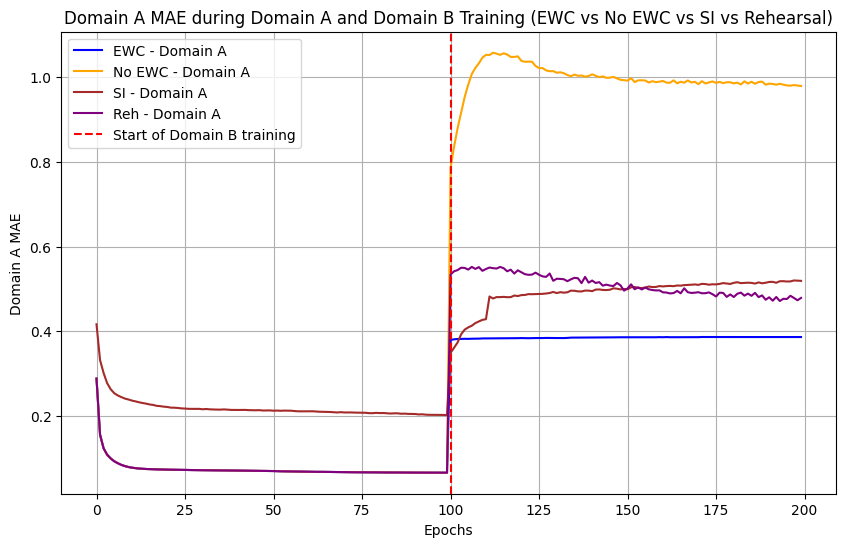

In [5]:
import matplotlib.pyplot as plt
import numpy as np
# Calculate the mean for Task A during Task A and Task B across all runs
ewc_initial_acc = np.mean(epoch_stats["Initial"]["A_during_A_val"], axis=0)  # Mean across runs
no_ewc_initial_acc = np.mean(epoch_stats["Initial"]["A_during_A_val"], axis=0)  # Same for No EWC
#pnn_A_during_A = np.mean(epoch_stats_other["pnn"]["A_during_A_val"], axis=0)
si_A_during_A = np.mean(epoch_stats_other["si"]["A_during_A_val"], axis=0)
reh_A_during_A = np.mean(epoch_stats_other["reh"]["A_during_A_val"], axis=0)



# Now for Task A accuracy during Task B training
#pnn_task_A_during_B = np.mean(epoch_stats_other_pnn["pnn"]["task_A_during_B"],axis=0) # Same for pnn
si_task_A_during_B = np.mean(epoch_stats_other["si"]["val_task_A_during_B"],axis=0) # Same for si
reh_task_A_during_B = np.mean(epoch_stats_other["reh"]["val_task_A_during_B"],axis=0) # Same for reh
ewc_task_A_during_B = np.mean(epoch_stats["ewc"]["val_domain_A_during_B"], axis=0)  # Average over runs
no_ewc_task_A_during_B = np.mean(epoch_stats_no_ewc_split["no_ewc"]["val_domain_A_during_B"], axis=0)  # Same for No EWC

# Concatenate the Task A accuracy during Task A and Task B phases
#pnn_task_A_combined = np.concatenate([pnn_A_during_A, pnn_task_A_during_B])
si_task_A_combined = np.concatenate([si_A_during_A, si_task_A_during_B])
reh_task_A_combined = np.concatenate([no_ewc_initial_acc, reh_task_A_during_B])
#pnn_task_A_combined=pnn_task_A_combined[:400]
ewc_task_A_combined = np.concatenate([ewc_initial_acc, ewc_task_A_during_B])
no_ewc_task_A_combined = np.concatenate([no_ewc_initial_acc, no_ewc_task_A_during_B])

# X-axis: first half for Task A training, second half for Task B training
total_epochs = len(ewc_task_A_combined)
x_values = np.arange(total_epochs)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_values, ewc_task_A_combined, label='EWC - Domain A', color='blue')
plt.plot(x_values, no_ewc_task_A_combined, label='No EWC - Domain A', color='orange')
#plt.plot(x_values, pnn_task_A_combined, label='PNN - Domain A', color='green')
plt.plot(x_values, si_task_A_combined, label='SI - Domain A', color='brown')
plt.plot(x_values, reh_task_A_combined, label='Reh - Domain A', color='purple')

# Mark the point where Task B training begins
plt.axvline(x=len(ewc_initial_acc), color='red', linestyle='--', label='Start of Domain B training')

# Labels, title, and legend
plt.xlabel('Epochs')
plt.ylabel('Domain A MAE')
plt.title('Domain A MAE during Domain A and Domain B Training (EWC vs No EWC vs SI vs Rehearsal)')
plt.legend()
plt.grid(True)

# Save and show the plot
#plt.savefig('C:/Users/gslax/OneDrive/Desktop/Wits/MastersResearchReport/DIL/Data/Toy/DIL_Toy_combined_mae_updated.png')
plt.show()


C:\Users\gslax\myenv\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\gslax\myenv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\gslax\myenv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


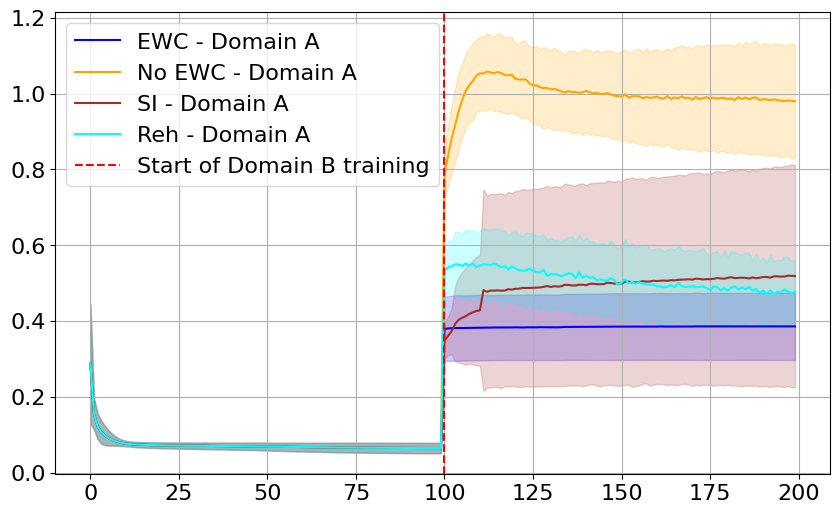

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the standard deviation for variance bands
ewc_initial_acc_std = np.std(epoch_stats["Initial"]["A_during_A"], axis=0)
no_ewc_initial_acc_std = np.std(epoch_stats["Initial"]["A_during_A"], axis=0)
pnn_A_during_A_std = np.std(epoch_stats_other["pnn"]["A_during_A_val"], axis=0)
si_A_during_A_std = np.std(epoch_stats_other["si"]["A_during_A_val"], axis=0)
reh_A_during_A_std = np.std(epoch_stats_other["reh"]["A_during_A_val"], axis=0)

# Standard deviation during Task B training

si_task_A_during_B_std = np.std(epoch_stats_other["si"]["val_task_A_during_B"], axis=0)
reh_task_A_during_B_std = np.std(epoch_stats_other["reh"]["val_task_A_during_B"], axis=0)
ewc_task_A_during_B_std = np.std(epoch_stats["ewc"]["val_domain_A_during_B"], axis=0)
no_ewc_task_A_during_B_std = np.std(epoch_stats_no_ewc_split["no_ewc"]["val_domain_A_during_B"], axis=0)

# Concatenate the means and standard deviations for both phases

si_task_A_combined = np.concatenate([ewc_initial_acc, si_task_A_during_B])
reh_task_A_combined = np.concatenate([no_ewc_initial_acc, reh_task_A_during_B])
ewc_task_A_combined = np.concatenate([ewc_initial_acc, ewc_task_A_during_B])
no_ewc_task_A_combined = np.concatenate([no_ewc_initial_acc, no_ewc_task_A_during_B])


si_task_A_combined_std = np.concatenate([no_ewc_initial_acc_std, si_task_A_during_B_std])
reh_task_A_combined_std = np.concatenate([no_ewc_initial_acc_std, reh_task_A_during_B_std])
ewc_task_A_combined_std = np.concatenate([ewc_initial_acc_std, ewc_task_A_during_B_std])
no_ewc_task_A_combined_std = np.concatenate([no_ewc_initial_acc_std, no_ewc_task_A_during_B_std])

# Define x-axis for the entire epoch range across both phases
total_epochs = len(ewc_task_A_combined)
x_values = np.arange(total_epochs)

# Plotting with variance bands
plt.figure(figsize=(10, 6))

# Plot EWC with variance band
plt.plot(x_values, ewc_task_A_combined, label='EWC - Domain A', color='blue')
plt.fill_between(x_values, ewc_task_A_combined - ewc_task_A_combined_std, ewc_task_A_combined + ewc_task_A_combined_std, color='blue', alpha=0.2)

# Plot No EWC with variance band
plt.plot(x_values, no_ewc_task_A_combined, label='No EWC - Domain A', color='orange')
plt.fill_between(x_values, no_ewc_task_A_combined - no_ewc_task_A_combined_std, no_ewc_task_A_combined + no_ewc_task_A_combined_std, color='orange', alpha=0.2)

# Plot SI with variance band
plt.plot(x_values, si_task_A_combined, label='SI - Domain A', color='brown')
plt.fill_between(x_values, si_task_A_combined - si_task_A_combined_std, si_task_A_combined + si_task_A_combined_std, color='brown', alpha=0.2)

# Plot Rehearsal with variance band
plt.plot(x_values, reh_task_A_combined, label='Reh - Domain A', color='cyan')
plt.fill_between(x_values, reh_task_A_combined - reh_task_A_combined_std, reh_task_A_combined + reh_task_A_combined_std, color='cyan', alpha=0.2)

# Mark the point where Task B training begins
plt.axvline(x=len(ewc_initial_acc), color='red', linestyle='--', label='Start of Domain B training')

# Labels, title, and legend
plt.xticks(fontsize=16)                 # Font size for x-axis ticks
plt.yticks(fontsize=16) 
plt.legend(fontsize=16)
plt.grid(True)

# Save and show the plot
#plt.savefig('DIL_Toy_combined_mae_updated_with_variance_bigger.png')
plt.show()


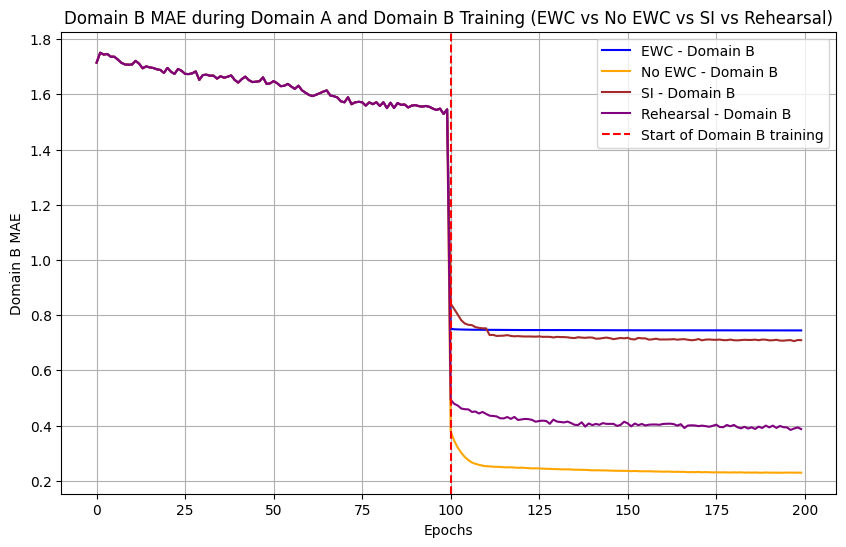

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the mean across runs for each method
task_B_ewc = np.mean(epoch_stats["ewc"]["val_task_B"], axis=0)  # Mean across runs for EWC
task_B_no_ewc = np.mean(epoch_stats_no_ewc_split["no_ewc"]["val_task_B"], axis=0)  # Mean across runs for No EWC
task_B_si = np.mean(epoch_stats_other["si"]["val_acc_B"], axis=0)  # Mean across runs for SI
task_B_reh = np.mean(epoch_stats_other["reh"]["val_acc_B"], axis=0)  # Mean across runs for Rehearsal


# Compute the mean across runs for each method on Domain B during training on Domain A
task_B_during_A_ewc = np.mean(epoch_stats["Initial"]["B_during_A_val"], axis=0)
task_B_during_A_no_ewc = np.mean(epoch_stats["Initial"]["B_during_A_val"], axis=0)
task_B_during_A_si = np.mean(epoch_stats_other["si"]["B_during_A_val"], axis=0)
task_B_during_A_reh = np.mean(epoch_stats_other["reh"]["B_during_A_val"], axis=0)


#task_B_during_A_reh = task_B_during_A_reh[:100]

# Concatenate Task B accuracy for both phases: during Task A and during Task B training
ewc_task_B_combined = np.concatenate([task_B_during_A_ewc, task_B_ewc])
no_ewc_task_B_combined = np.concatenate([task_B_during_A_no_ewc, task_B_no_ewc])

si_task_B_combined = np.concatenate([task_B_during_A_ewc, task_B_si])
reh_task_B_combined = np.concatenate([task_B_during_A_ewc, task_B_reh])

# Define x-axis for the entire epoch range across both phases
total_epochs = len(ewc_task_B_combined)
x_values = np.arange(total_epochs)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot MAE for each method
# Plot Domain B accuracy during training on Domain B for each method
plt.plot(x_values, ewc_task_B_combined, label='EWC - Domain B', color='blue')
plt.plot(x_values, no_ewc_task_B_combined, label='No EWC - Domain B', color='orange')
#plt.plot(x_values, pnn_task_B_combined, label='PNN - Domain B', color='green')
plt.plot(x_values, si_task_B_combined, label='SI - Domain B', color='brown')
plt.plot(x_values, reh_task_B_combined, label='Rehearsal - Domain B', color='purple')

# Mark the point where Task B training begins
plt.axvline(x=len(task_B_ewc), color='red', linestyle='--', label='Start of Domain B training')

# Labels, title, and legend
plt.xlabel('Epochs')
plt.ylabel('Domain B MAE')
plt.title('Domain B MAE during Domain A and Domain B Training (EWC vs No EWC vs SI vs Rehearsal)')
plt.legend()
plt.grid(True)

# Show the plot
#plt.savefig('C:/Users/gslax/OneDrive/Desktop/Wits/MastersResearchReport/DIL/Data/Toy/DIL_Toy_domainB_duringA_and_B.png')
plt.show()


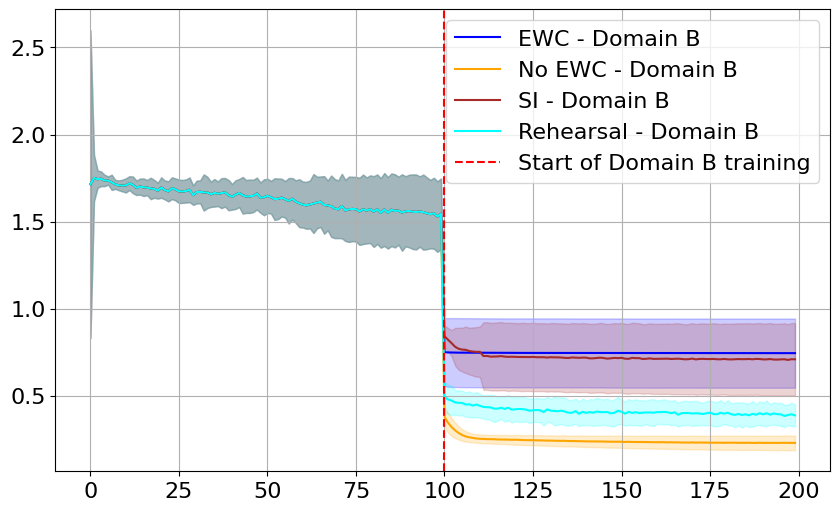

In [94]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the mean across runs for each method
task_B_ewc = np.mean(epoch_stats["ewc"]["val_task_B"], axis=0)
task_B_no_ewc = np.mean(epoch_stats_no_ewc_split["no_ewc"]["val_task_B"], axis=0)
task_B_si = np.mean(epoch_stats_other["si"]["val_acc_B"], axis=0)
task_B_reh = np.mean(epoch_stats_other["reh"]["val_acc_B"], axis=0)


# Compute the standard deviation for variance bands
task_B_ewc_std = np.std(epoch_stats["ewc"]["val_task_B"], axis=0)
task_B_no_ewc_std = np.std(epoch_stats_no_ewc_split["no_ewc"]["val_task_B"], axis=0)
task_B_si_std = np.std(epoch_stats_other["si"]["val_acc_B"], axis=0)
task_B_reh_std = np.std(epoch_stats_other["reh"]["val_acc_B"], axis=0)


# Compute the mean and standard deviation during Domain A training
task_B_during_A_ewc = np.mean(epoch_stats["Initial"]["B_during_A_val"], axis=0)
task_B_during_A_no_ewc = np.mean(epoch_stats["Initial"]["B_during_A_val"], axis=0)
task_B_during_A_si = np.mean(epoch_stats_other["si"]["B_during_A_val"], axis=0)
task_B_during_A_reh = np.mean(epoch_stats_other_reh["reh"]["B_during_A_val"], axis=0)


task_B_during_A_ewc_std = np.std(epoch_stats["Initial"]["B_during_A_val"], axis=0)
task_B_during_A_no_ewc_std = np.std(epoch_stats["Initial"]["B_during_A_val"], axis=0)
task_B_during_A_si_std = np.std(epoch_stats_other["si"]["B_during_A_val"], axis=0)
task_B_during_A_reh_std = np.std(epoch_stats_other["reh"]["B_during_A_val"], axis=0)


# Adjust Rehearsal phase length


# Concatenate Task B accuracy for both phases: during Task A and during Task B training
ewc_task_B_combined = np.concatenate([task_B_during_A_ewc, task_B_ewc])
no_ewc_task_B_combined = np.concatenate([task_B_during_A_no_ewc, task_B_no_ewc])

si_task_B_combined = np.concatenate([task_B_during_A_ewc, task_B_si])
reh_task_B_combined = np.concatenate([task_B_during_A_ewc, task_B_reh])

# Combine standard deviations
ewc_task_B_combined_std = np.concatenate([task_B_during_A_ewc_std, task_B_ewc_std])
no_ewc_task_B_combined_std = np.concatenate([task_B_during_A_no_ewc_std, task_B_no_ewc_std])

si_task_B_combined_std = np.concatenate([task_B_during_A_ewc_std, task_B_si_std])
reh_task_B_combined_std = np.concatenate([task_B_during_A_ewc_std, task_B_reh_std])

# Define x-axis for the entire epoch range across both phases
total_epochs = len(ewc_task_B_combined)
x_values = np.arange(total_epochs)

# Plot the results with variance bands
plt.figure(figsize=(10, 6))

# Plot EWC with variance band
plt.plot(x_values, ewc_task_B_combined, label='EWC - Domain B', color='blue')
plt.fill_between(x_values, ewc_task_B_combined - ewc_task_B_combined_std, ewc_task_B_combined + ewc_task_B_combined_std, color='blue', alpha=0.2)

# Plot No EWC with variance band
plt.plot(x_values, no_ewc_task_B_combined, label='No EWC - Domain B', color='orange')
plt.fill_between(x_values, no_ewc_task_B_combined - no_ewc_task_B_combined_std, no_ewc_task_B_combined + no_ewc_task_B_combined_std, color='orange', alpha=0.2)

# Plot SI with variance band
plt.plot(x_values, si_task_B_combined, label='SI - Domain B', color='brown')
plt.fill_between(x_values, si_task_B_combined - si_task_B_combined_std, si_task_B_combined + si_task_B_combined_std, color='brown', alpha=0.2)

# Plot Rehearsal with variance band
plt.plot(x_values, reh_task_B_combined, label='Rehearsal - Domain B', color='cyan')
plt.fill_between(x_values, reh_task_B_combined - reh_task_B_combined_std, reh_task_B_combined + reh_task_B_combined_std, color='cyan', alpha=0.2)

# Mark the point where Task B training begins
plt.axvline(x=len(task_B_during_A_ewc), color='red', linestyle='--', label='Start of Domain B training')

# Labels, title, and legend
plt.xticks(fontsize=16)                 # Font size for x-axis ticks
plt.yticks(fontsize=16) 
plt.legend(fontsize=16)
plt.grid(True)

# Save and show the plot
plt.savefig('DIL_Toy_domainB_duringA_and_B_with_variance_bigger.png')
plt.show()


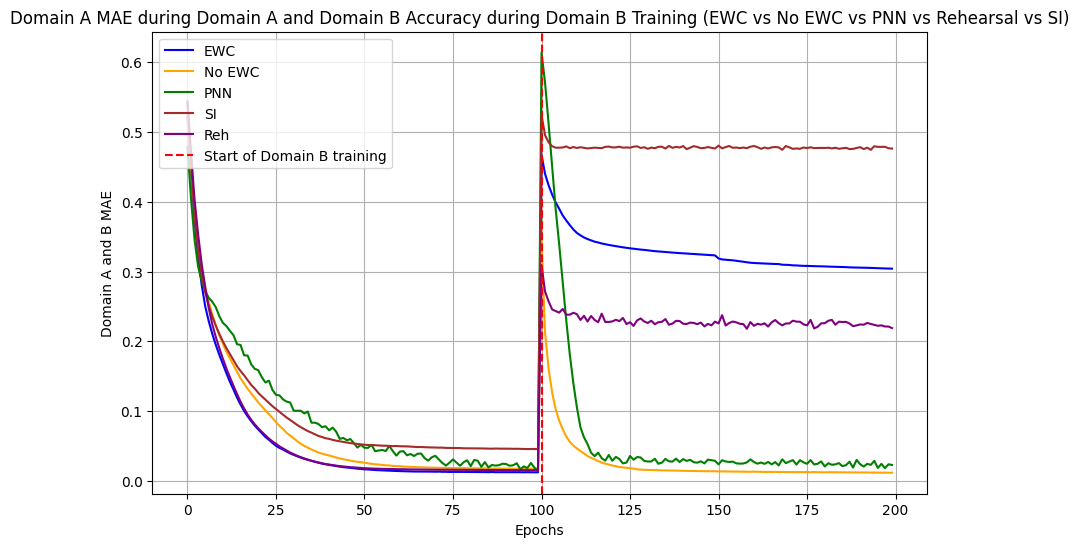

In [369]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the mean for Task A during Domain A and Domain B across all runs
ewc_initial_acc = np.mean(epoch_stats_A["Initial"]["accuracy"], axis=0)  # Mean across runs
no_ewc_initial_acc = np.mean(epoch_stats_A_no_ewc["Initial"]["accuracy"], axis=0)  # Same for No EWC
pnn_task_A_during_A = np.mean(epoch_stats_other["pnn"]["A_during_A_val"], axis=0)
si_task_A_during_A = np.mean(epoch_stats_other_si["si"]["A_during_A_val"], axis=0)
reh_task_A_during_A = np.mean(epoch_stats_other["reh"]["A_during_A_val"], axis=0)


task_B_ewc = np.mean(epoch_stats["ewc"]["val_task_B"], axis=0)  # Mean across runs for EWC
task_B_no_ewc = np.mean(epoch_stats["no_ewc"]["val_task_B"], axis=0)  # Mean across runs for No EWC
task_B_si = np.mean(epoch_stats_other["si"]["val_acc_B"], axis=0)  # Mean across runs for SI
task_B_reh = np.mean(epoch_stats_other["reh"]["val_acc_B"], axis=0)  # Mean across runs for Rehearsal
task_B_pnn = np.mean(epoch_stats_other["pnn"]["val_acc_B"], axis=0)  # Mean across runs for PNN


# Concatenate the Domain A accuracy during Domain A and Domain B phases
ewc_task_A_combined = np.concatenate([ewc_initial_acc, task_B_ewc])
no_ewc_task_A_combined = np.concatenate([no_ewc_initial_acc, task_B_no_ewc])
pnn_task_A_combined = np.concatenate([pnn_task_A_during_A, task_B_pnn])
si_task_A_combined = np.concatenate([si_task_A_during_A, task_B_si])
reh_task_A_combined = np.concatenate([reh_task_A_during_A, task_B_reh])

# X-axis: first half for Domain A training, second half for Domain B training
total_epochs = len(ewc_task_A_combined)
x_values = np.arange(total_epochs)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_values, ewc_task_A_combined, label='EWC', color='blue')
plt.plot(x_values, no_ewc_task_A_combined, label='No EWC', color='orange')
plt.plot(x_values, pnn_task_A_combined, label='PNN', color='green')
plt.plot(x_values, si_task_A_combined, label='SI', color='brown')
plt.plot(x_values, reh_task_A_combined, label='Reh', color='purple')

# Mark the point where Domain B training begins
plt.axvline(x=len(ewc_initial_acc), color='red', linestyle='--', label='Start of Domain B training')

# Labels, title, and legend
plt.xlabel('Epochs')
plt.ylabel('Domain A and B MAE')
plt.title('Domain A MAE during Domain A and Domain B Accuracy during Domain B Training (EWC vs No EWC vs PNN vs Rehearsal vs SI)')
plt.legend()
plt.grid(True)

# Save and show the plot
plt.savefig('C:/Users/gslax/OneDrive/Desktop/Wits/MastersResearchReport/DIL/Data/Toy/DIL_Toy_MAE_DomainA_and_DomainB.png')
plt.show()


In [114]:
avg_final_epoch_task_A_A_si =np.mean(np.array(epoch_stats_other["si"]["A_during_A_val"])[:, -1])

In [7]:
# Extract data directly from dictionaries without modifying their original structure
import pandas as pd
# Helper function to calculate max, min, and mean for final epoch from a dictionary
def calculate_final_epoch_stats_from_dict(data_dict, key):
    data = np.array(data_dict[key])  # Convert to NumPy array
    max_final = np.max(data[:, -1])  # Max of the final epoch
    min_final = np.min(data[:, -1])  # Min of the final epoch
    mean_final = np.mean(data[:, -1])  # Mean of the final epoch
    return max_final, min_final, mean_final

# Average of the final epoch for Task A during Task A training
avg_final_epoch_task_A_A = np.mean(np.array(epoch_stats["Initial"]["A_during_A_val"])[:, -1])
avg_final_epoch_task_A_A = np.mean(np.array(epoch_stats["Initial"]["A_during_A_val"])[:, -1])
avg_final_epoch_task_A_A_si = np.mean(np.array(epoch_stats_other["si"]["A_during_A_val"])[:, -1])
avg_final_epoch_task_A_A = np.mean(np.array(epoch_stats["Initial"]["A_during_A_val"])[:, -1])

# Helper function to calculate max, min, mean, std, and bounds for final epoch
def calculate_final_epoch_stats_from_dict(data_dict, key):
    data = np.array(data_dict[key])  # Convert to NumPy array
    final_epoch_values = data[:, -1]  # Extract values from the last epoch

    max_final = np.max(final_epoch_values)  # Max of the final epoch
    min_final = np.min(final_epoch_values)  # Min of the final epoch
    mean_final = np.mean(final_epoch_values)  # Mean of the final epoch
    std_final = np.std(final_epoch_values)  # Standard deviation of the final epoch

    upper_bound = mean_final + 2 * std_final  # Mean + 2*STD
    lower_bound = mean_final - 2 * std_final  # Mean - 2*STD

    return max_final, min_final, mean_final, std_final, upper_bound, lower_bound

# Extract final epoch statistics for Task A during Task B training (including bounds)
ewc_max_final, ewc_min_final, ewc_mean_final, ewc_std_final, ewc_upper, ewc_lower = calculate_final_epoch_stats_from_dict(epoch_stats["ewc"], "val_domain_A_during_B")
no_ewc_max_final, no_ewc_min_final, no_ewc_mean_final, no_ewc_std_final, no_ewc_upper, no_ewc_lower = calculate_final_epoch_stats_from_dict(epoch_stats_no_ewc_split["no_ewc"], "val_domain_A_during_B")
si_max_final, si_min_final, si_mean_final, si_std_final, si_upper, si_lower = calculate_final_epoch_stats_from_dict(epoch_stats_other["si"], "val_task_A_during_B")
reh_max_final, reh_min_final, reh_mean_final, reh_std_final, reh_upper, reh_lower = calculate_final_epoch_stats_from_dict(epoch_stats_other["reh"], "val_task_A_during_B")

# Average of the final epoch for Task A during Task A training
avg_final_epoch_task_A_A = np.mean(np.array(epoch_stats["Initial"]["A_during_A_val"])[:, -1])
avg_final_epoch_task_A_A_si = np.mean(np.array(epoch_stats_other["si"]["A_during_A_val"])[:, -1])

# Create a summary table for Task A during Task B training (including bounds)
final_epoch_summary = pd.DataFrame({
    "Method": ["EWC", "No EWC", "SI", "Rehearsal"],
    "Domain A After A": [avg_final_epoch_task_A_A, avg_final_epoch_task_A_A, avg_final_epoch_task_A_A_si, avg_final_epoch_task_A_A],
    "Mean MAE After B": [ewc_mean_final, no_ewc_mean_final, si_mean_final, reh_mean_final],
    "Max MAE After B": [ewc_max_final, no_ewc_max_final, si_max_final, reh_max_final],
    "Min MAE After B": [ewc_min_final, no_ewc_min_final, si_min_final, reh_min_final],
    "Upper Bound (Mean + 2*STD)": [ewc_upper, no_ewc_upper, si_upper, reh_upper],
    "Lower Bound (Mean - 2*STD)": [ewc_lower, no_ewc_lower, si_lower, reh_lower]
})



print("\Domain A Performance After Training on Domain A and After Domain B")
print(final_epoch_summary)





\Domain A Performance After Training on Domain A and After Domain B
      Method  Domain A After A  Mean MAE After B  Max MAE After B  \
0        EWC          0.065416          0.386073         0.525666   
1     No EWC          0.065416          0.979505         1.151032   
2         SI          0.201594          0.518853         1.141156   
3  Rehearsal          0.065416          0.478573         0.620314   

   Min MAE After B  Upper Bound (Mean + 2*STD)  Lower Bound (Mean - 2*STD)  
0         0.266783                    0.563019                    0.209127  
1         0.588816                    1.274882                    0.684128  
2         0.258055                    1.104249                   -0.066543  
3         0.326608                    0.646057                    0.311090  


In [104]:
# Calculate statistics for the final epoch of Task B during Task B training

import numpy as np
import pandas as pd

# Helper function to calculate mean, max, min, std, and bounds for the final epoch
def calculate_final_epoch_stats_task_B(data_dict, key):
    data = np.array(data_dict[key])  # Convert to NumPy array
    final_epoch_values = data[:, -1]  # Extract values from the last epoch

    mean_final = np.mean(final_epoch_values)  # Mean of the final epoch
    max_final = np.max(final_epoch_values)  # Max of the final epoch
    min_final = np.min(final_epoch_values)  # Min of the final epoch
    std_final = np.std(final_epoch_values)  # Standard deviation of the final epoch

    upper_bound = mean_final + 2 * std_final  # Mean + 2*STD
    lower_bound = mean_final - 2 * std_final  # Mean - 2*STD

    return mean_final, max_final, min_final, std_final, upper_bound, lower_bound

# Calculate stats for each method (including bounds)
task_B_ewc_mean, task_B_ewc_max, task_B_ewc_min, task_B_ewc_std, task_B_ewc_upper, task_B_ewc_lower = calculate_final_epoch_stats_task_B(epoch_stats["ewc"], "val_task_B")
task_B_no_ewc_mean, task_B_no_ewc_max, task_B_no_ewc_min, task_B_no_ewc_std, task_B_no_ewc_upper, task_B_no_ewc_lower = calculate_final_epoch_stats_task_B(epoch_stats_no_ewc_split["no_ewc"], "val_task_B")
task_B_si_mean, task_B_si_max, task_B_si_min, task_B_si_std, task_B_si_upper, task_B_si_lower = calculate_final_epoch_stats_task_B(epoch_stats_other["si"], "val_acc_B")
task_B_reh_mean, task_B_reh_max, task_B_reh_min, task_B_reh_std, task_B_reh_upper, task_B_reh_lower = calculate_final_epoch_stats_task_B(epoch_stats_other["reh"], "val_acc_B")

# Create a summary table for Task B during Task B training (including bounds)
final_epoch_task_B_summary = pd.DataFrame({
    "Method": ["EWC", "No EWC", "SI", "Rehearsal"],
    "Mean Final MAE": [task_B_ewc_mean, task_B_no_ewc_mean, task_B_si_mean, task_B_reh_mean],
    "Max Final MAE": [task_B_ewc_max, task_B_no_ewc_max, task_B_si_max, task_B_reh_max],
    "Min Final MAE": [task_B_ewc_min, task_B_no_ewc_min, task_B_si_min, task_B_reh_min],
    "Upper Bound (Mean + 2*STD)": [task_B_ewc_upper, task_B_no_ewc_upper, task_B_si_upper, task_B_reh_upper],
    "Lower Bound (Mean - 2*STD)": [task_B_ewc_lower, task_B_no_ewc_lower, task_B_si_lower, task_B_reh_lower]
})


# Display results for Task B
print("Final Epoch Summary for Domain B During Domain B Training")
print(final_epoch_task_B_summary)


Final Epoch Summary for Domain B During Domain B Training
      Method  Mean Final MAE  Max Final MAE  Min Final MAE  \
0        EWC        0.744726       0.984978       0.312379   
1     No EWC        0.229353       0.270573       0.147951   
2         SI        0.709320       0.916776       0.269106   
3  Rehearsal        0.387448       0.479230       0.263568   

   Upper Bound (Mean + 2*STD)  Lower Bound (Mean - 2*STD)  
0                    1.142082                    0.347370  
1                    0.314053                    0.144654  
2                    1.123989                    0.294651  
3                    0.515040                    0.259857  


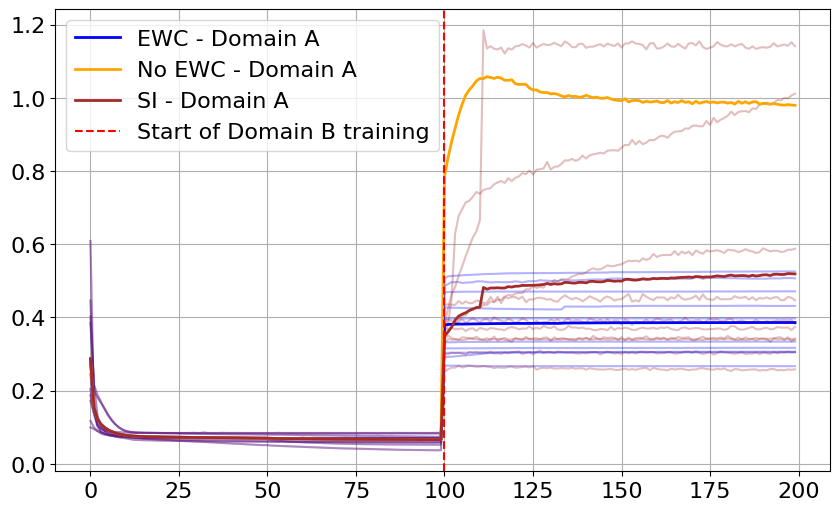

In [121]:
import numpy as np
import matplotlib.pyplot as plt

# Extract individual runs for each method
ewc_runs = np.array(epoch_stats["ewc"]["val_domain_A_during_B"])  # Shape: (num_runs, num_epochs)
no_ewc_runs = np.array(epoch_stats_no_ewc_split["no_ewc"]["val_domain_A_during_B"])
si_runs = np.array(epoch_stats_other["si"]["val_task_A_during_B"])
reh_runs = np.array(epoch_stats_other["reh"]["val_task_A_during_B"])

# Extract initial performance (before Task B) for each run
ewc_initial = np.array(epoch_stats["Initial"]["A_during_A"])
no_ewc_initial = np.array(epoch_stats["Initial"]["A_during_A"])
si_initial = np.array(epoch_stats_other["si"]["A_during_A_val"])
reh_initial = np.array(epoch_stats_other["reh"]["A_during_A_val"])

# Concatenate initial phase with Task B training phase for each run
ewc_full = np.concatenate([ewc_initial, ewc_runs], axis=1)  # Shape: (num_runs, total_epochs)
no_ewc_full = np.concatenate([no_ewc_initial, no_ewc_runs], axis=1)
si_full = np.concatenate([no_ewc_initial, si_runs], axis=1)
reh_full = np.concatenate([no_ewc_initial, reh_runs], axis=1)

# Define x-axis
total_epochs = ewc_full.shape[1]
x_values = np.arange(total_epochs)

plt.figure(figsize=(10, 6))

# Plot individual runs for each method
for i in range(ewc_full.shape[0]):  # Loop over 10 runs
    plt.plot(x_values, ewc_full[i], color='blue', alpha=0.3)
    #plt.plot(x_values, no_ewc_full[i], color='orange', alpha=0.2)
    plt.plot(x_values, si_full[i], color='brown', alpha=0.3)
    #plt.plot(x_values, reh_full[i], color='cyan', alpha=0.2)

# Plot mean trends for clarity
plt.plot(x_values, np.mean(ewc_full, axis=0), color='blue', label='EWC - Domain A', linewidth=2)
plt.plot(x_values, np.mean(no_ewc_full, axis=0), color='orange', label='No EWC - Domain A', linewidth=2)
plt.plot(x_values, np.mean(si_full, axis=0), color='brown', label='SI - Domain A', linewidth=2)
#plt.plot(x_values, np.mean(reh_full, axis=0), color='cyan', label='Reh - Domain A', linewidth=2)

# Mark the start of Task B training
plt.axvline(x=len(ewc_initial[0]), color='red', linestyle='--', label='Start of Domain B training')

# Formatting
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)

# Save and display the plot
plt.savefig('DIL_Toy_combined_mae_updated_with_runs.png')
plt.show()


In [122]:
import numpy as np
import torch.optim as optim
import torch.nn as nn

# Hyperparameters
learning_rate = 0.0001
epochs = 1
num_runs = 1  # Each lambda value gets 10 trials
baseline_lambda = 1250000000000  # Example baseline
lambda_variations = [1.01, 0.99, 1.02, 0.98, 1.05, 0.95, 1.10, 0.90]  
lambda_values = [baseline_lambda] + [int(baseline_lambda * factor) for factor in lambda_variations]

# Initialize storage for each lambda configuration
epoch_stats_sensitivity = {f"ewc_lambda_{lam}": {"A_during_B": [], "B": [], "A": []} for lam in lambda_values}

# Train on Domain A once and store weights
print("Training on Domain A once...")
model_A = SimpleNeuralNet()
optimizer_A = optim.Adam(model_A.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

for epoch in range(epochs):
    train(model_A, train_loader_A, optimizer_A, criterion, epochs=1)

# Save Domain A-trained weights
torch.save(model_A.state_dict(), 'domain_A_trained_weights.pth')

# Sensitivity Analysis: Train on Domain B with different lambda_ewc values
for lambda_ewc in lambda_values:
    print(f"\nRunning EWC with lambda_ewc = {lambda_ewc}")

    for run in range(num_runs):
        print(f"  Run {run + 1}/{num_runs}")

        # Load pre-trained weights from Domain A
        model = SimpleNeuralNet()
        model.load_state_dict(torch.load('domain_A_trained_weights.pth'))
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)

        # Initialize EWC with pre-trained model
        ewc = EWC(model, train_loader_A, importance=lambda_ewc)

        # Track results
        task_A_run, task_B_run, A_during_B_run = [], [], []

        for epoch in range(epochs):
            train_with_ewc(model, train_loader_B, ewc, optimizer, criterion, epochs=1)
            mae_B = evaluate(model, test_loader_B, criterion)["mae"]
            mae_A_during_B = evaluate(model, test_loader_A, criterion)["mae"]

            task_B_run.append(mae_B)
            A_during_B_run.append(mae_A_during_B)

        # Store results for analysis
        epoch_stats_sensitivity[f"ewc_lambda_{lambda_ewc}"]["B"].append(task_B_run)
        epoch_stats_sensitivity[f"ewc_lambda_{lambda_ewc}"]["A_during_B"].append(A_during_B_run)


Training on Domain A once...
Epoch 1/1, Loss: 0.2405, MAE: 0.4013

Running EWC with lambda_ewc = 1250000000000
  Run 1/1


C:\Users\gslax\AppData\Local\Temp\ipykernel_26776\908946870.py:37: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('domain_A_trained_weights.p

Epoch 1/1, Loss: 1.3581, Penalty: 7600494.4268, MAE: 1.1029

Running EWC with lambda_ewc = 1262500000000
  Run 1/1
Epoch 1/1, Loss: 1.3519, Penalty: 7586226.9472, MAE: 1.1002

Running EWC with lambda_ewc = 1237500000000
  Run 1/1
Epoch 1/1, Loss: 1.3516, Penalty: 7470861.6898, MAE: 1.1001

Running EWC with lambda_ewc = 1275000000000
  Run 1/1
Epoch 1/1, Loss: 1.3580, Penalty: 7614842.8258, MAE: 1.1029

Running EWC with lambda_ewc = 1225000000000
  Run 1/1
Epoch 1/1, Loss: 1.3531, Penalty: 7681972.7360, MAE: 1.1007

Running EWC with lambda_ewc = 1312500000000
  Run 1/1
Epoch 1/1, Loss: 1.3381, Penalty: 7562288.6087, MAE: 1.0946

Running EWC with lambda_ewc = 1187500000000
  Run 1/1
Epoch 1/1, Loss: 1.3220, Penalty: 7956834.7552, MAE: 1.0876

Running EWC with lambda_ewc = 1375000000000
  Run 1/1
Epoch 1/1, Loss: 1.3478, Penalty: 7724845.6343, MAE: 1.0985

Running EWC with lambda_ewc = 1125000000000
  Run 1/1
Epoch 1/1, Loss: 1.3044, Penalty: 8078213.5451, MAE: 1.0801
